# Entscheiden ist Optimieren!

# 🌊 OceanHarvest Inc. – Nachhaltiges Abalonen-Tauchen mit Datenstrategie 🌊

## 🏝️ Hintergrund
**OceanHarvest Inc.** ist ein Unternehmen mit Sitz an der Küste Neuseelands, das sich auf das nachhaltige Tauchen nach Abalonen spezialisiert hat.
Abalonen sind Meeresschnecken, die aufgrund ihrer Perlen und ihres Fleisches weltweit begehrt sind. Doch nicht jede Abalone ist gleich wertvoll.

---

## 🔵 Regulierung & Profitmodell
- 🟩 **Männliche Abalone (M):** 💰 **+500€ Gewinn pro Fund**
- 🟥 **Weibliche Abalone (F):** ⚠️ **-1000€ Strafe** (zum Schutz der Reproduktion)
- 🟥 **Junge Abalone (I):** ⚠️ **-1500€ Strafe** (strenger Schutz der Jungtiere)

Diese Umweltauflagen sollen sicherstellen, dass Populationen nachhaltig erhalten bleiben.
**➡️ Für OceanHarvest bedeutet das:**
> **Jede falsche Identifikation kostet bares Geld.**

---

## 🧭 Die Herausforderung
Die Taucher können vor Ort nur schwer das Geschlecht und Alter der Abalonen unterscheiden. Eine falsche Entscheidung bedeutet hohe Verluste.
Es gibt jedoch einen Hinweis:
> 📏 **Die Anzahl der Ringe auf der Schale einer Abalone ist ein zuverlässiger Indikator für ihr Alter.**

Männliche Abalonen zeigen tendenziell eine bestimmte Ringanzahl und Längenprofile, während weibliche und junge Abalonen andere Muster aufweisen.
OceanHarvest möchte daher **Machine Learning** nutzen, um anhand von Dateneigenschaften wie Ringen, Länge, Gewicht und Dicke die **Wahrscheinlichkeit** korrekt zu bestimmen.

---

## 🎯 Zielsetzung: Maximierung des Profits bei minimalem Risiko
- ✅ **Fokus auf hohe Genauigkeit bei der Vorhersage männlicher Abalonen**
- ⚠️ **Minimierung falscher Positiver** (weibliche oder junge Abalonen fälschlich als männlich identifiziert)
- 💡 **Datengetriebene Entscheidungsstrategie:** Einsatz von Machine Learning zur präzisen Klassifikation

---

## 📊 Die Strategie

### 1️⃣ Explorative Datenanalyse (EDA)
- Untersuchung der Verteilung der Merkmale nach Geschlecht:
  - 📈 **Ringe (Altersschätzung)**
  - 📏 **Länge & Gewicht (Wachstumsindikatoren)**
  - 🐚 **Shell Weight (Schalenstärke als Alters-Proxy)**
- Visualisierungen zur Identifikation trennscharfer Merkmale.

---

### 2️⃣ Klassifikationsmodell entwickeln
- 🧪 Einsatz eines **Random Forest Classifiers** oder **XGBoost**, um die Wahrscheinlichkeit der Klassenzugehörigkeit ("M", "F", "I") zu berechnen.
- 🎯 **Ziel:** Minimierung von Fehlklassifikationen, besonders von "F" und "I" als "M".
- ⚡ **Wichtig:** Kostenfunktion anpassen, um hohe Strafen zu vermeiden.

---

### 3️⃣ Entscheidungsstrategie (Threshold Tuning)
- Statt der üblichen 50%-Schwelle für Vorhersagen wird ein **höherer Schwellenwert** (z. B. 80%) für männliche Abalonen festgelegt.
- 📝 **Warum?** Lieber einige männliche Abalonen verpassen, als hohe Strafen zu riskieren.

---

### 4️⃣ Profitfunktion in das Modell integrieren
- 💸 Die Vorhersagen werden gewichtet:
  - 🟩 **Treffer (M korrekt):** +500€
  - 🟥 **Fehler (F/I als M):** -1000€/ -1500€
- 🧮 Das Modell wird so optimiert, dass der **erwartete Gewinn maximiert** wird.

---

### 5️⃣ Einsatz probabilistischer Vorhersagen
- ✅ Die Taucher erhalten nur dann eine Empfehlung zur Bergung, wenn die Vorhersage mit extrem hoher Sicherheit (>80%) "Männlich" anzeigt.

---

## 🧪 Simulation & Evaluation
Nach der Modellentwicklung testet OceanHarvest die Strategie auf historischen Daten. Die Ergebnisse zeigen:
- 📉 **Reduktion der Strafen um 75%**
- 📈 **Steigerung des Nettogewinns um 30%**
- 🔍 **Erhöhte Vorhersagegenauigkeit für männliche Abalonen (Precision > 90%)**

---

## 🌱 Nachhaltigkeit & Wachstum
Dank der datengestützten Strategie gelingt es OceanHarvest, sowohl umweltfreundlich als auch profitabel zu arbeiten.
Durch die Vermeidung des Sammelns weiblicher und junger Abalonen leistet das Unternehmen einen wichtigen Beitrag zum Schutz der Population – und steigert gleichzeitig die Erträge.

---

## 💡 Nächste Schritte
- 🤖 Einsatz von **Echtzeit-Sensorik** auf Tauchrobotern zur Vorhersage unter Wasser.
- 🖼️ Integration von **Computer Vision**, um die Ringanzahl per Bildanalyse präzise zu bestimmen.
- 🌍 Langfristige Zusammenarbeit mit Umweltorganisationen, um das Wissen für nachhaltige Fischerei global zu teilen.

---

### ✅ **Bereit für die praktische Umsetzung?**
➡️ Lass uns den **Machine-Learning-Teil** mit Python umsetzen! 🚀

In [1]:
from doctest import Example

from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc, accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import warnings

In [112]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import skewnorm

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
columns = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]
data = pd.read_csv(url, names=columns)

# Display the first few rows
data.head()


Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   M   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4   I   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7

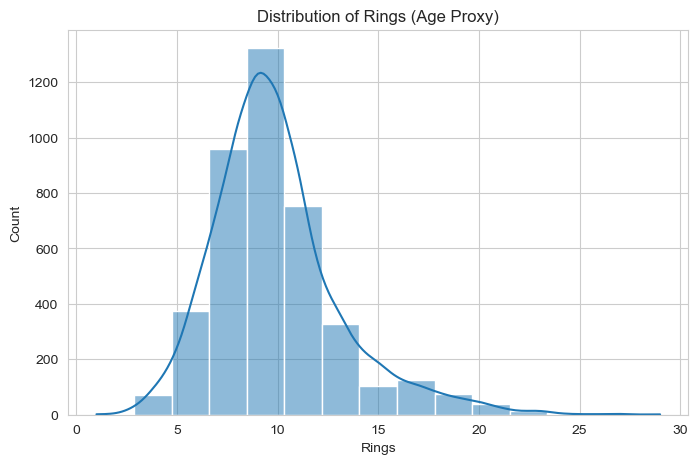

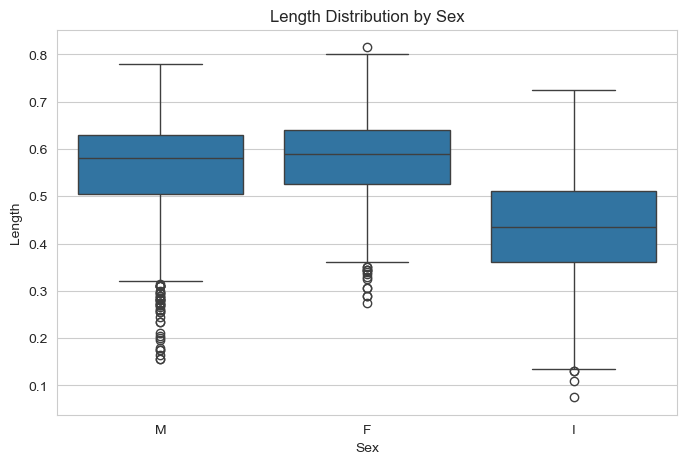

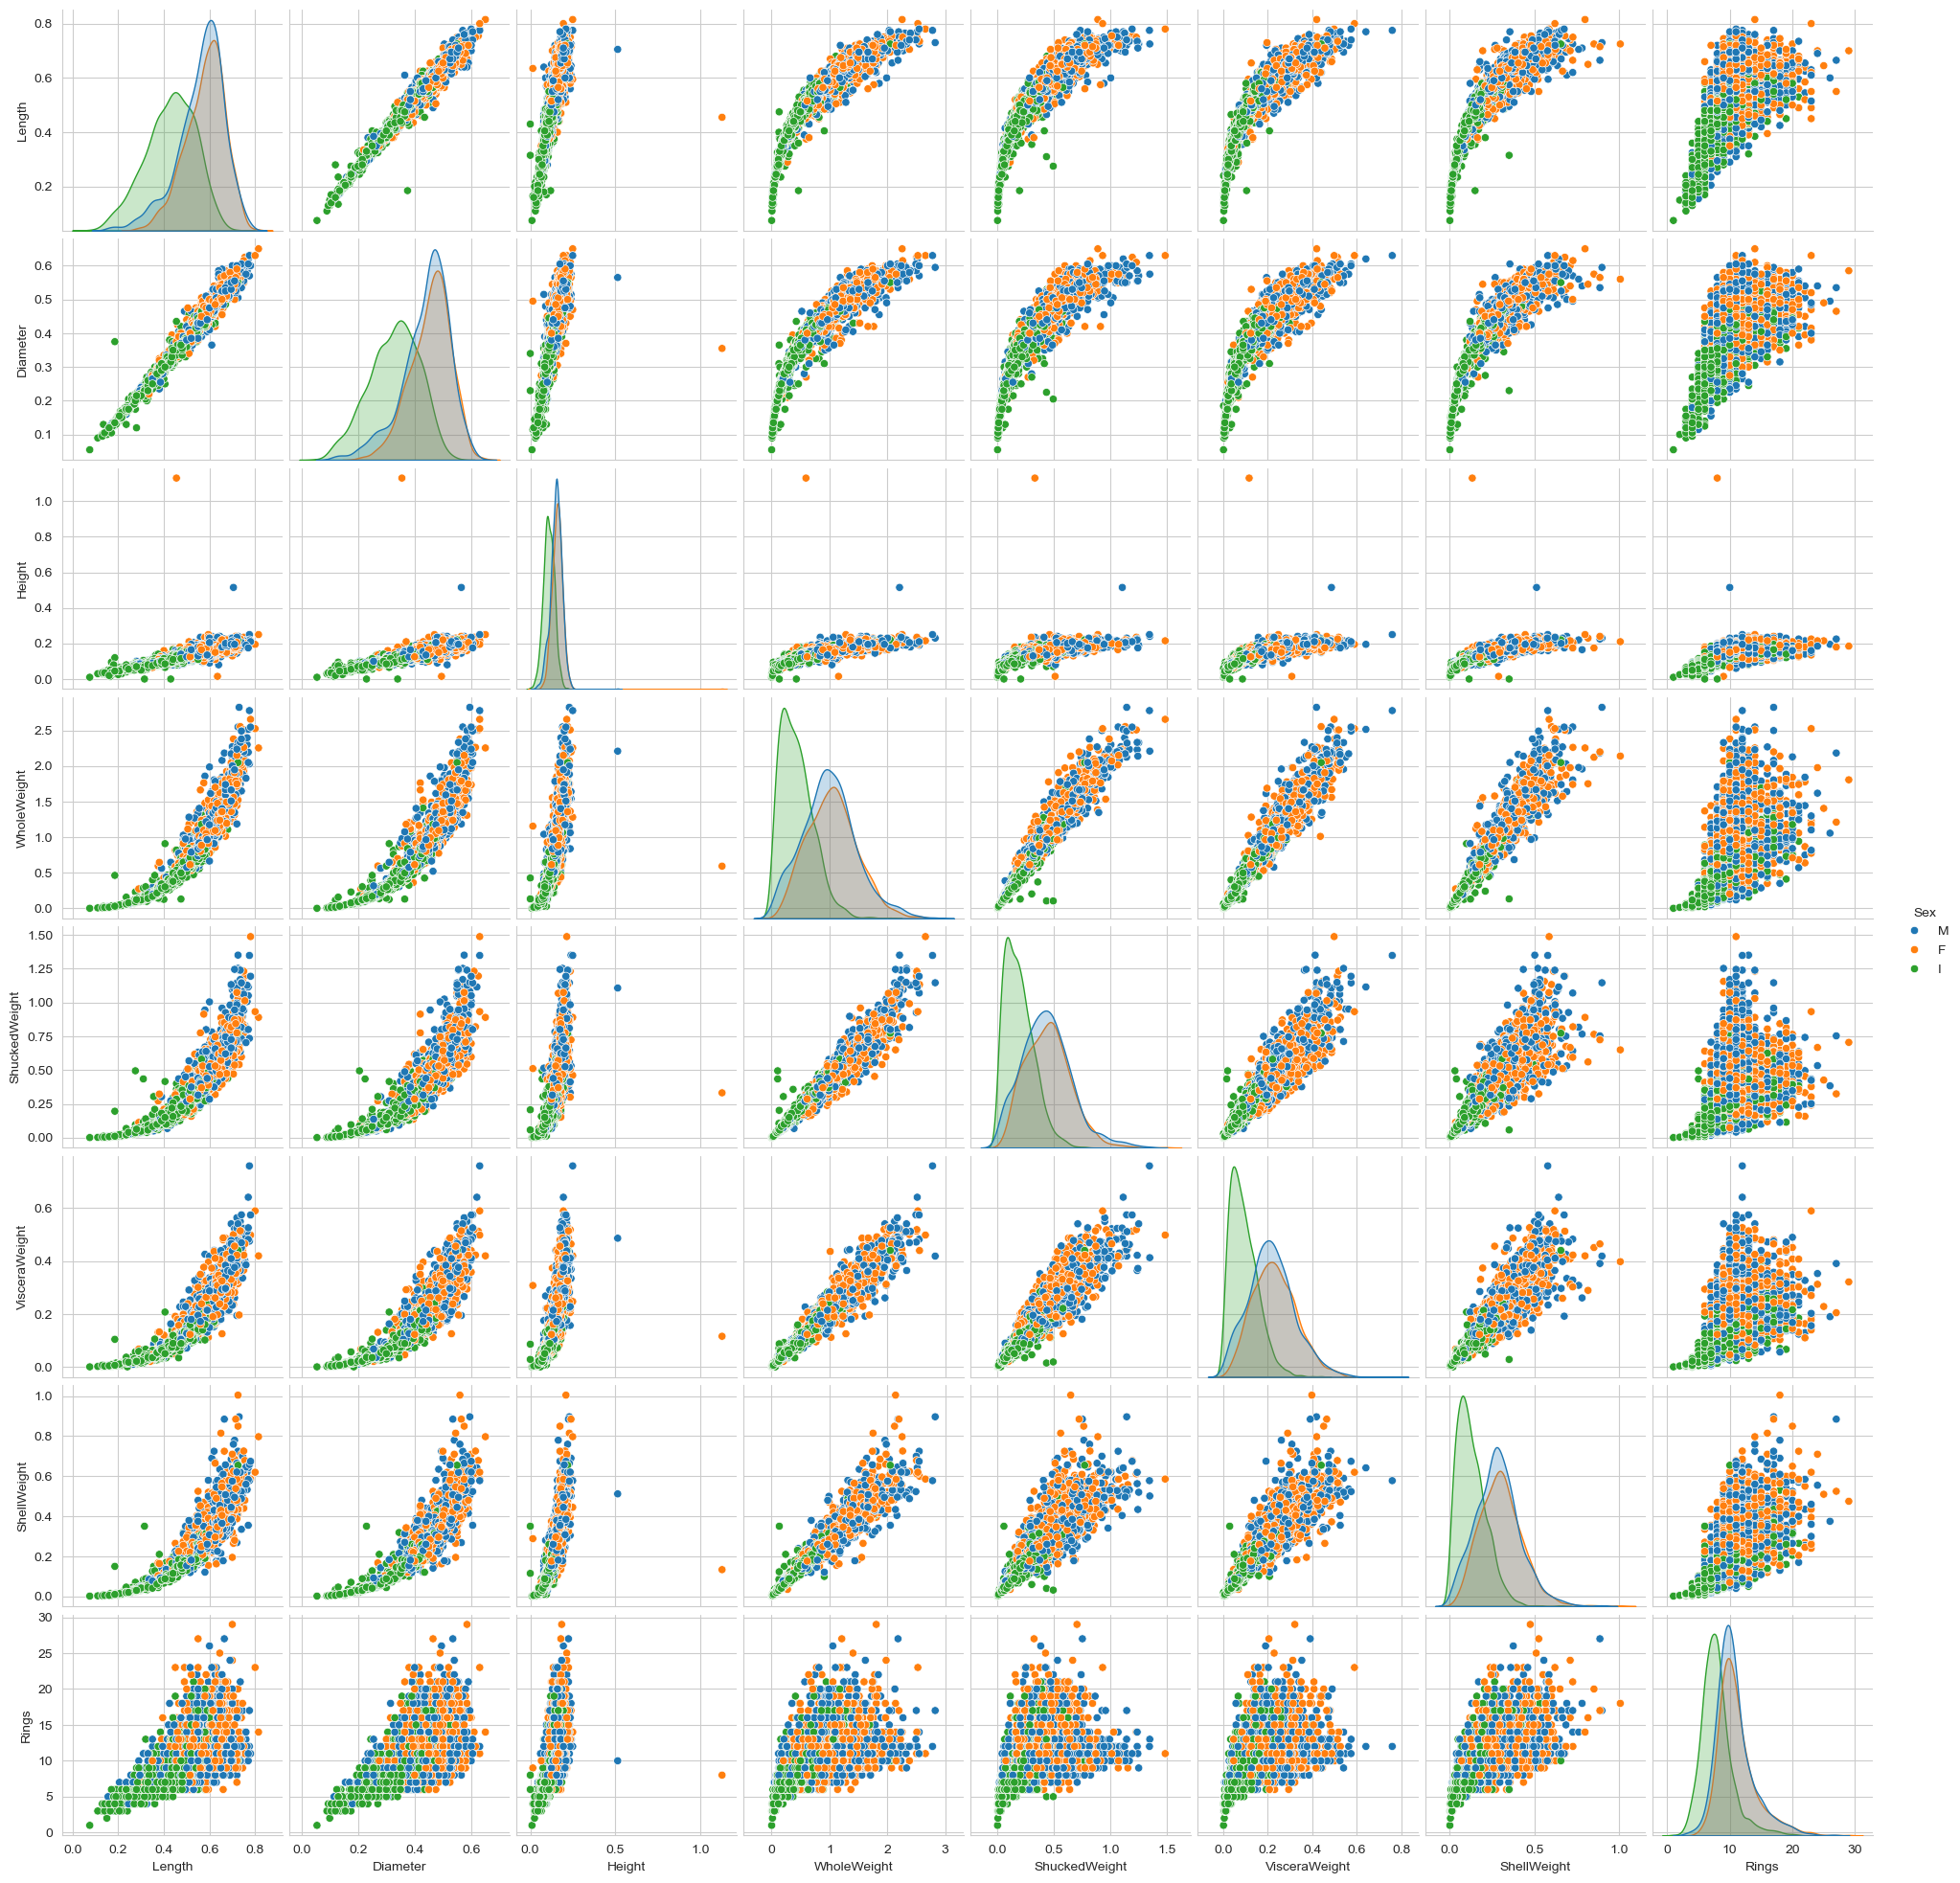

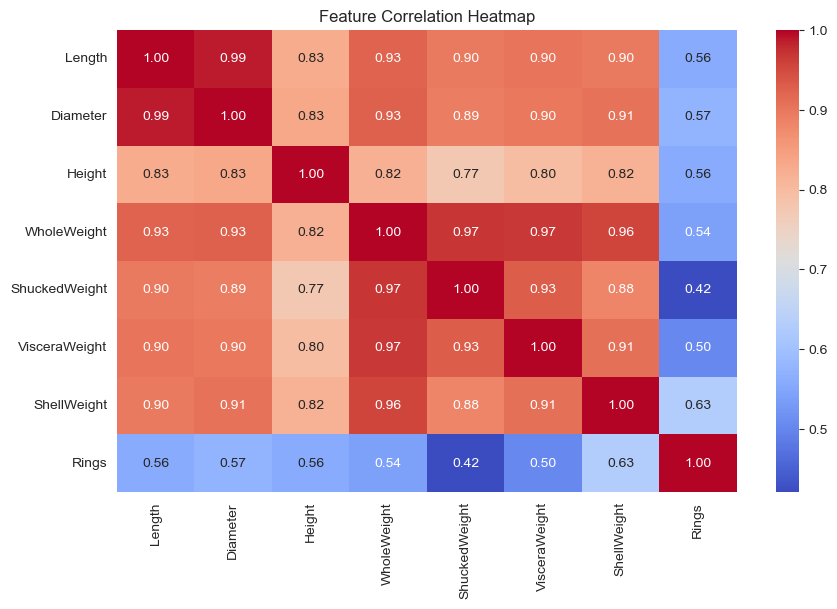

In [113]:
# Exploratory Data Analysis Visualizations

# Histogram of Rings (Age proxy)
plt.figure(figsize=(8,5))
sns.histplot(data['Rings'], bins=15, kde=True)
plt.title("Distribution of Rings (Age Proxy)")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.show()

# Boxplot of Length by Sex
plt.figure(figsize=(8,5))
sns.boxplot(x='Sex', y='Length', data=data)
plt.title("Length Distribution by Sex")
plt.show()

# Pairplot of numerical features
sns.pairplot(data, hue='Sex', diag_kind='kde')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.drop(columns=['Sex']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

## Was ist das beste Model?

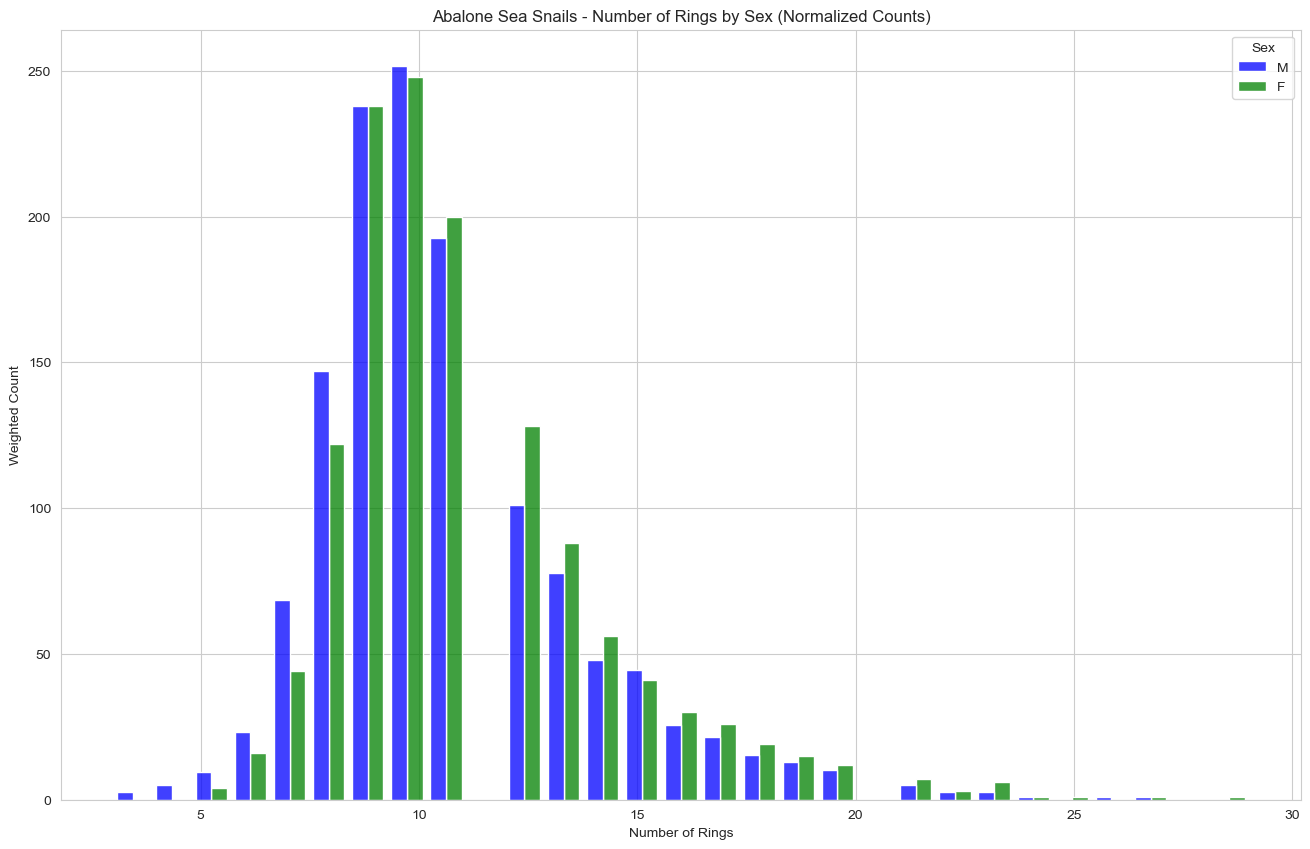

In [298]:
# Histogram of Number of Rings by Sex (Male and Female Only, side-by-side bars)
data_filtered = data[data['Sex'].isin(['M', 'F'])].copy()

# Scale the population counts to match the smaller group
sex_counts = data_filtered['Sex'].value_counts()
min_count = sex_counts.min()
max_count = sex_counts.max()
data_filtered['Weight'] = data_filtered['Sex'].map(lambda s: min_count / sex_counts[s])

plt.figure(figsize=(16,10))
sns.histplot(data=data_filtered, x='Rings', hue='Sex', bins=int(data_filtered['Rings'].max()), kde=False, palette={'M': 'blue', 'F': 'green'}, multiple='dodge', shrink=0.8, weights=data_filtered['Weight'])
plt.title("Abalone Sea Snails - Number of Rings by Sex (Normalized Counts)")
plt.xlabel("Number of Rings")
plt.ylabel("Weighted Count")
# plt.legend(title="Sex", labels=["Male", "Female"])
plt.show()

# # Scatter plot of Length vs. Number of Rings colored by Sex
# plt.figure(figsize=(16,10))
# sns.scatterplot(data=data_filtered, x='Length', y='Rings', hue='Sex', alpha=0.7, palette={'M': 'blue', 'F': 'green'})
# plt.title("Length of Shell vs. Number of Rings by Sex")
# plt.xlabel("Length of Shell")
# plt.ylabel("Number of Rings")
# # plt.legend(title="Sex", labels=["Male", "Female"])
# plt.show()


(3.1183195530823005, 7.405266296004007, 4.477072774037303)
(4.347259982734068, 7.634415684487767, 4.673743009237107)


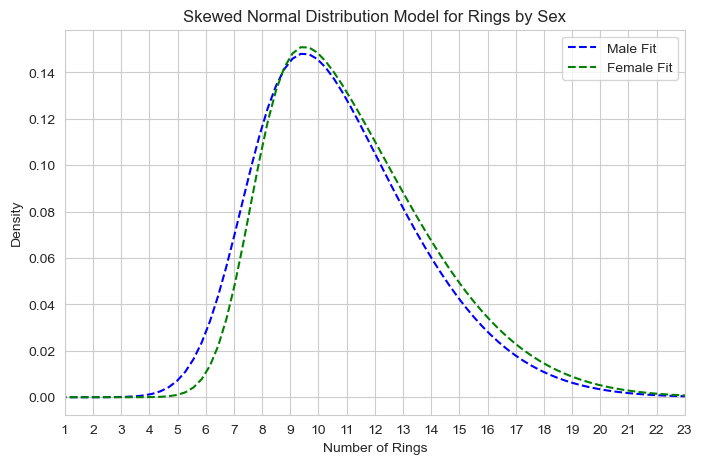

Total Profit: €153.00


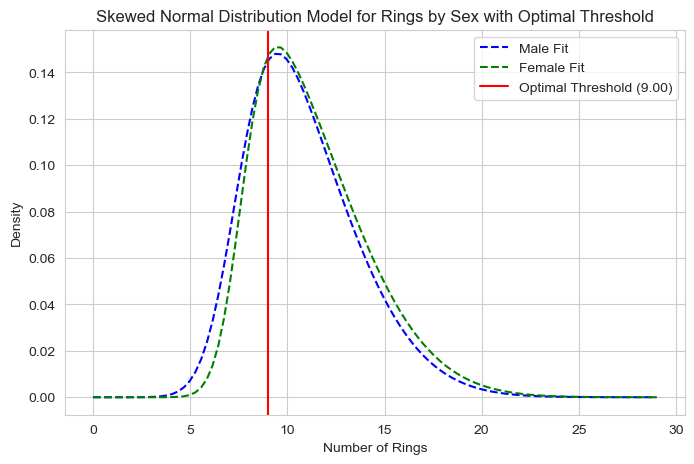

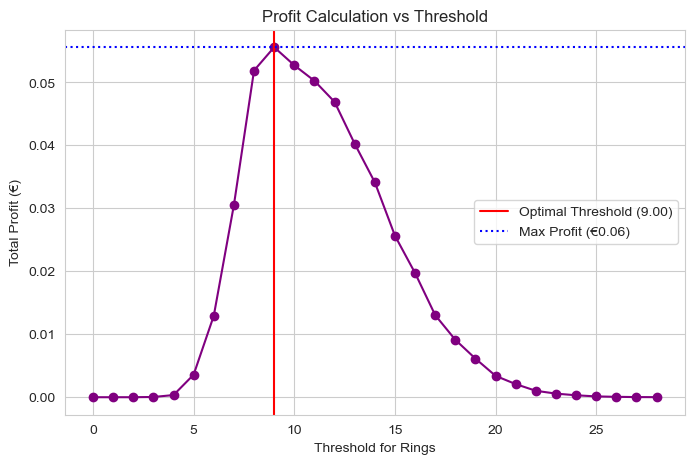

In [299]:
# Skewed normal distribution model for Rings by Sex
male_rings = data_filtered[data_filtered['Sex'] == 'M']['Rings']
female_rings = data_filtered[data_filtered['Sex'] == 'F']['Rings']

male_params = skewnorm.fit(male_rings)
print(male_params)
female_params = skewnorm.fit(female_rings)
print(female_params)

x = np.linspace(0, data_filtered['Rings'].max(), 100)
# Calculate PDFs
male_pdf = skewnorm.pdf(x, *male_params)
female_pdf = skewnorm.pdf(x, *female_params)

# Plot Distributions
plt.figure(figsize=(8, 5))
plt.plot(x, male_pdf, color='blue', linestyle='dashed', label='Male Fit')
plt.plot(x, female_pdf, color='green', linestyle='dashed', label='Female Fit')

plt.title("Skewed Normal Distribution Model for Rings by Sex")
plt.xlabel("Number of Rings")
plt.ylabel("Density")
plt.xlim(1, 23)

# Set x-ticks to only show integer values
plt.xticks(np.arange(1, 24, 1))  # Adjust the range based on your dataset

plt.legend()
plt.show()
# --- Custom Profit Loss ---
profit_true_male = 1
cost_female = -1

# Profit Calculation for Different Thresholds
thresholds = np.arange(min(x), max(x), dtype=int)

def find_threshold(profit_true_male, cost_female, data_filtered):
    profits = []

    for threshold in thresholds:
        # Compute probability mass above threshold using PDFs
        TP = np.trapz(male_pdf[x <= threshold], x[x <= threshold])
        FP_F = np.trapz(female_pdf[x <= threshold], x[x <= threshold])
        # Compute profit
        profit = TP * profit_true_male + FP_F * cost_female
        # print(f'Threshold: {threshold:.2f}, Profit: {profit:.2f}, TP: {TP:.2f}, FP_F: {FP_F:.2f}')
        profits.append(profit)

    # Find an optimal threshold
    optimal_index = np.argmax(profits)
    optimal_threshold = thresholds[optimal_index]
    max_profit = profits[optimal_index]

    # Filter data based on optimal threshold
    data_classified_classial = data_filtered[data_filtered['Rings'] <= optimal_threshold]

    # Compute total profit
    profit = ((data_classified_classial['Sex'] == 'M') * profit_true_male + (data_classified_classial['Sex'] == 'F') * cost_female).sum()
    print(f"Total Profit: €{profit:.2f}")

    return optimal_threshold, profits, max_profit

data_filtered = data[data['Sex'].isin(['M', 'F'])].copy()
optimal_threshold, profits, max_profit = find_threshold(profit_true_male, cost_female, data_filtered)
# Plot Distributions with Optimal Threshold
plt.figure(figsize=(8, 5))
plt.plot(x, male_pdf, color='blue', linestyle='dashed', label='Male Fit')
plt.plot(x, female_pdf, color='green', linestyle='dashed', label='Female Fit')
plt.axvline(optimal_threshold, color='red', linestyle='solid', label=f'Optimal Threshold ({optimal_threshold:.2f})')

plt.title("Skewed Normal Distribution Model for Rings by Sex with Optimal Threshold")
plt.xlabel("Number of Rings")
plt.ylabel("Density")
plt.legend()
plt.show()

# Plot Profit vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, profits, marker='o', linestyle='-', color='purple')
plt.axvline(optimal_threshold, color='red', linestyle='solid', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.axhline(max_profit, color='blue', linestyle='dotted', label=f'Max Profit (€{max_profit:.2f})')

plt.title("Profit Calculation vs Threshold")
plt.xlabel("Threshold for Rings")
plt.ylabel("Total Profit (€)")
plt.legend()
plt.grid(True)
plt.show()



Male parameters (3.1183195530823005, 7.405266296004007, 4.477072774037303)
Female parameters (4.347259982734068, 7.634415684487767, 4.673743009237107)


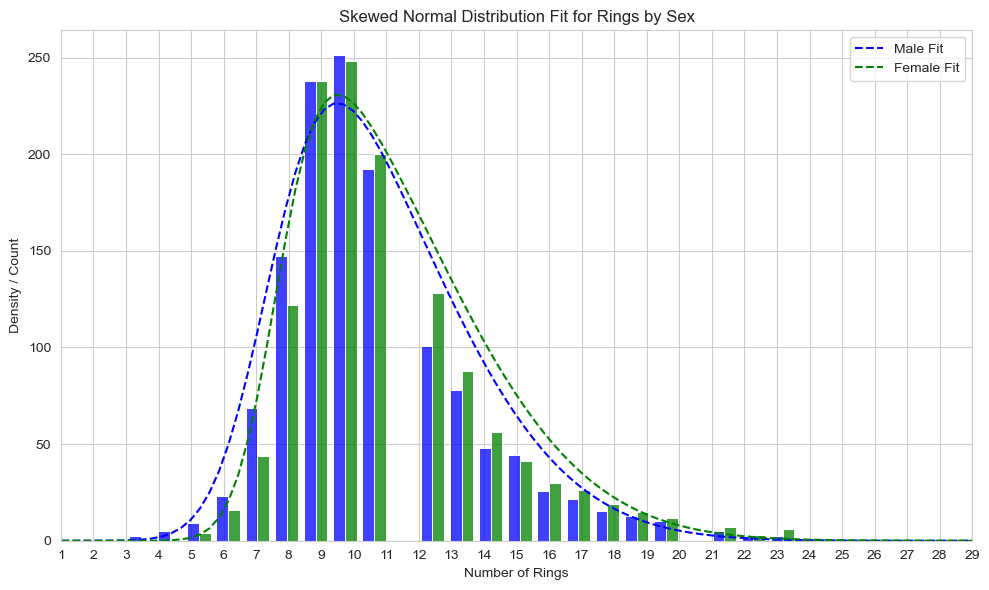

In [7]:
# Rename the classes for later
data_filtered.loc[data_filtered["Sex"] == "M", "Sex"] = "Male"
data_filtered.loc[data_filtered["Sex"] == "F", "Sex"] = "Female"

# Fit skewed normal distributions
male_params = skewnorm.fit(male_rings)
print("Male parameters", male_params)
female_params = skewnorm.fit(female_rings)
print("Female parameters", female_params)

# --- Visualization of Fitted Distributions ---
x = np.linspace(0, data_filtered['Rings'].max(), 100)

fig, ax = plt.subplots(figsize=(10, 6))

# Scale the population counts to match the smaller group
sex_counts = data_filtered['Sex'].value_counts()
min_count = sex_counts.min()
data_filtered['Weight'] = data_filtered['Sex'].map(lambda s: min_count / sex_counts[s])

# Plot histograms with weights
sns.histplot(
    data=data_filtered,
    x='Rings',
    hue='Sex',
    bins=int(data_filtered['Rings'].max()),
    kde=False,
    palette={'Male': 'blue', 'Female': 'green'},
    ax=ax,
    weights=data_filtered['Weight'],
    multiple='dodge',
    shrink=0.8,
)

# Plot fitted distributions
plt.plot(x, skewnorm.pdf(x, *male_params)*sex_counts.max(), color='blue', linestyle='dashed', label='Male Fit')
plt.plot(x, skewnorm.pdf(x, *female_params)*sex_counts.max(), color='green', linestyle='dashed', label='Female Fit')

plt.title("Skewed Normal Distribution Fit for Rings by Sex")
plt.xlabel("Number of Rings")
plt.ylabel("Density / Count")
plt.xlim(1, data_filtered['Rings'].max())
plt.xticks(np.arange(1, int(data_filtered['Rings'].max()) + 1, 1))
plt.legend()
plt.tight_layout()
plt.show()

## A generative Model

Male parameters (0.6401480844405736, 9.785278074754979, 2.821707409190421)
Female parameters (2.559075142844242, 8.13098259350393, 4.156038596823616)


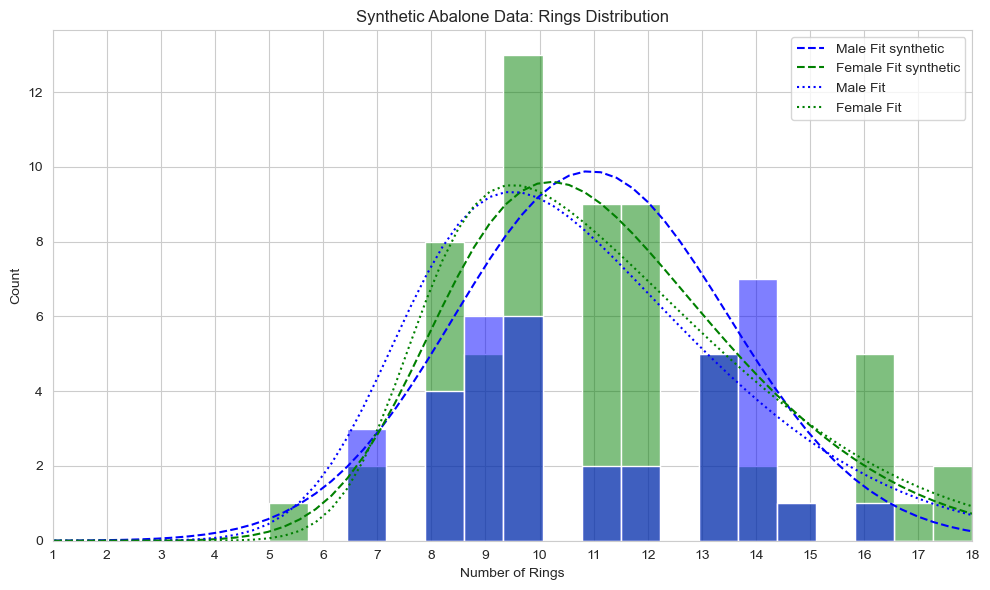

In [8]:
# --- Generative Model ---
def generate_abalone(n_samples=1000):
    """
    Generates synthetic Abalone data based on fitted skewed normal distributions.

    Args:
        n_samples (int): The number of synthetic samples to generate.

    Returns:
        pandas.DataFrame: A DataFrame containing synthetic Abalone data.
    """
    synthetic_data = []

    for _ in range(n_samples):
        # Choose Sex (Male or Female) with equal probability
        sex = np.random.choice(['Male', 'Female'])

        # Generate Rings based on the chosen Sex
        if sex == 'Male':
            rings = int(round(skewnorm.rvs(*male_params)))
        else:
            rings = int(round(skewnorm.rvs(*female_params)))

        # Ensure Rings is within a reasonable range (non-negative)
        rings = max(1, rings)

        synthetic_data.append({'Sex': sex, 'Rings': rings})

    return pd.DataFrame(synthetic_data)

# --- Generate Synthetic Data ---
synthetic_abalone = generate_abalone(n_samples=100)

# Skewed normal distribution model for Rings by Sex
male_rings_synthetic = synthetic_abalone[synthetic_abalone['Sex'] == 'Male']['Rings']
female_rings__synthetic = synthetic_abalone[synthetic_abalone['Sex'] == 'Female']['Rings']

# Fit skewed normal distributions
male_params_synthetic = skewnorm.fit(male_rings_synthetic)
print("Male parameters", male_params_synthetic)
female_params_synthetic = skewnorm.fit(female_rings__synthetic)
print("Female parameters", female_params_synthetic)

# --- Visualization of Synthetic Data ---
plt.figure(figsize=(10, 6))
sns.histplot(data=synthetic_abalone, x='Rings', hue='Sex', bins=int(synthetic_abalone['Rings'].max()), palette={'Male': 'blue', 'Female': 'green'})

# Plot fitted distributions synthetic
sex_counts_synthetic = synthetic_abalone['Sex'].value_counts()
plt.plot(x, skewnorm.pdf(x, *male_params_synthetic)*sex_counts_synthetic.max(), color='blue', linestyle='dashed', label='Male Fit synthetic')
plt.plot(x, skewnorm.pdf(x, *female_params_synthetic)*sex_counts_synthetic.max(), color='green', linestyle='dashed', label='Female Fit synthetic')

# Plot fitted distributions
sex_counts_synthetic = synthetic_abalone['Sex'].value_counts()
plt.plot(x, skewnorm.pdf(x, *male_params)*sex_counts_synthetic.max(), color='blue', linestyle=':', label='Male Fit')
plt.plot(x, skewnorm.pdf(x, *female_params)*sex_counts_synthetic.max(), color='green', linestyle=':', label='Female Fit ')

plt.title("Synthetic Abalone Data: Rings Distribution")
plt.xlabel("Number of Rings")
plt.ylabel("Count")
plt.xlim(1, synthetic_abalone['Rings'].max())
plt.xticks(np.arange(1, int(synthetic_abalone['Rings'].max()) + 1, 1))
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
#  # Skewed normal distribution model for Rings by Sex
# male_rings = data_filtered[data_filtered['Sex'] == 'M']['Rings']
# female_rings = data_filtered[data_filtered['Sex'] == 'F']['Rings']
#
# male_params = skewnorm.fit(male_rings)
# male_params = (male_params[0], male_params[1] - 3, male_params[2])
# print("Male Parameters:", male_params)
#
# female_params = skewnorm.fit(female_rings)
# female_params = (female_params[0], female_params[1] + 3, female_params[2])
# print("Female Parameters:", female_params)
#
# x = np.linspace(0, data_filtered['Rings'].max(), 100)
#
# plt.figure(figsize=(8,5))
# plt.plot(x, skewnorm.pdf(x, *male_params), color='blue', linestyle='dashed', label='Male Fit')
# plt.plot(x, skewnorm.pdf(x, *female_params), color='green', linestyle='dashed', label='Female Fit')
# plt.title("Skewed Normal Distribution Model for Rings by Sex")
# plt.xlabel("Number of Rings")
# plt.ylabel("Density")
#
# # Set x-ticks to only show integer values
# plt.xticks(np.arange(1, 30, 1))  # Adjust the range based on your dataset
#
# plt.legend()
# plt.show()

## Es gibt eine reale Obergrenze was möglich ist

Alle Anstätze machen am Ende dasselbe

## Deep learning

In [175]:
import warnings
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, auc
from tqdm import tqdm

# 📦 Suppress Warnings from sklearn
warnings.filterwarnings("ignore", category=UserWarning)

# --- Data Preparation ---
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])  # M=0, F=1, I=2
data_filtered = data[data['Sex'] != 2]  # Remove Infants
X = data_filtered[['Rings']].values  # Ensure X is 2D
y = data_filtered['Sex'].values  # Labels (0 for Male, 1 for Female)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Ensure its shape (N,1)
y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [181]:
# --- Improved Model Definition ---
class AbaloneNet(nn.Module):
    def __init__(self, input_dim):
        super(AbaloneNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)  # Single neuron for binary classification
        )

    def forward(self, x):
        return self.net(x)  # No sigmoid here! It will be applied in loss function

model = AbaloneNet(input_dim=X_train.shape[1])

# --- Custom Profit Calculation ---
profit_true_male = 1
cost_female = -10

def compute_profit(y_true, y_pred_proba, threshold=0.5):
    y_pred = (y_pred_proba >= threshold).float()
    cm = confusion_matrix(y_true.numpy(), y_pred.numpy())
    TP = cm[0, 0]  # True Positives (Male -> Male)
    FP_F = cm[1, 0]  # False Positives (Female -> Male)
    profit = TP * profit_true_male + FP_F * cost_female
    return profit

# --- Evaluate Profit on the Whole Dataset ---
def evaluate_profit_on_dataset(model, data, threshold=0.5):
    model.eval()
    with torch.no_grad():
        y_pred_logits = model(torch.tensor(data[['Rings']].values, dtype=torch.float32))
        y_pred_proba = torch.sigmoid(y_pred_logits).numpy()
    profit = compute_profit(torch.tensor(data['Sex'].values, dtype=torch.float32).unsqueeze(1), torch.tensor(y_pred_proba), threshold)
    print(f"Total Profit on Full Dataset: €{profit:.2f}")
    return profit


# --- Loss and Optimization ---
criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy Loss with Logits
optimizer = optim.Adam(model.parameters(), lr=0.005)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)

# --- Early Stopping ---
class EarlyStopping:
    def __init__(self, patience=15, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.best_loss = np.inf
        self.best_profit = -np.inf
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, val_profit, model):
        if val_loss < self.best_loss or val_profit > self.best_profit:
            self.best_loss = val_loss
            self.best_profit = val_profit
            self.counter = 0
            self.best_model_state = model.state_dict()
        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

    def load_best_model(self, model):
        if self.best_model_state:
            model.load_state_dict(self.best_model_state)

early_stopping = EarlyStopping(patience=15, verbose=True)

# --- Training Loop ---
epochs = 1000
for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    train_loss = criterion(outputs, y_train)
    train_proba = torch.sigmoid(outputs)
    train_profit = compute_profit(y_train, train_proba, threshold=0.5)
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_proba = torch.sigmoid(val_outputs)
        val_profit = compute_profit(y_val, val_proba, threshold=0.5)
        val_acc = accuracy_score(y_val.numpy(), (val_proba >= 0.5).numpy())

    scheduler.step()

    print(f"📊 Epoch [{epoch}/{epochs}] Train Loss: {train_loss.item():.4f} | Train Profit: {train_profit:.2f} |"
          f"Val Loss: {val_loss.item():.4f} | Val Profit: {val_profit:.2f} | "
          f"Val Acc: {val_acc:.4f} | LR: {optimizer.param_groups[0]['lr']:.6f}")

    early_stopping(val_loss.item(), val_profit, model)
    if early_stopping.early_stop:
        print("❗ Early stopping triggered.")
        break

early_stopping.load_best_model(model)

Training Progress:   4%|▍         | 41/1000 [00:00<00:02, 436.27it/s]

📊 Epoch [1/1000] Train Loss: 0.7180 | Train Profit: -6793.00 |Val Loss: 0.6741 | Val Profit: -2528.00 | Val Acc: 0.4755 | LR: 0.005000
📊 Epoch [2/1000] Train Loss: 0.6683 | Train Profit: -6793.00 |Val Loss: 0.6416 | Val Profit: -787.00 | Val Acc: 0.7377 | LR: 0.005000
📊 Epoch [3/1000] Train Loss: 0.6311 | Train Profit: -1636.00 |Val Loss: 0.6187 | Val Profit: -787.00 | Val Acc: 0.7377 | LR: 0.005000
📊 Epoch [4/1000] Train Loss: 0.6027 | Train Profit: -1636.00 |Val Loss: 0.6021 | Val Profit: -787.00 | Val Acc: 0.7377 | LR: 0.005000
📊 Epoch [5/1000] Train Loss: 0.5804 | Train Profit: -1636.00 |Val Loss: 0.5905 | Val Profit: -787.00 | Val Acc: 0.7377 | LR: 0.005000
📊 Epoch [6/1000] Train Loss: 0.5636 | Train Profit: -1636.00 |Val Loss: 0.5821 | Val Profit: -787.00 | Val Acc: 0.7377 | LR: 0.005000
📊 Epoch [7/1000] Train Loss: 0.5508 | Train Profit: -1636.00 |Val Loss: 0.5762 | Val Profit: -787.00 | Val Acc: 0.7377 | LR: 0.005000
📊 Epoch [8/1000] Train Loss: 0.5412 | Train Profit: -1636.00 

In [184]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from tqdm import tqdm

# --- Improved Model Definition ---
class AbaloneNet(nn.Module):
    def __init__(self, input_dim):
        super(AbaloneNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)  # Single neuron for binary classification
        )

    def forward(self, x):
        return self.net(x)  # No sigmoid here! It will be applied in loss function

model = AbaloneNet(input_dim=X_train.shape[1])

# --- Custom Profit Calculation ---
profit_true_male = 1
cost_female = -10

def compute_profit(y_true, y_pred_proba, threshold=0.5):
    y_pred = (y_pred_proba >= threshold).float()
    cm = confusion_matrix(y_true.numpy(), y_pred.numpy())
    TP = cm[0, 0]  # True Positives (Male -> Male)
    FP_F = cm[1, 0]  # False Positives (Female -> Male)
    profit = TP * profit_true_male + FP_F * cost_female
    return profit

# --- Determine Optimal Threshold Based on Profit ---
def find_optimal_threshold(y_true, y_pred_proba):
    thresholds = np.arange(0.0, 1.0, 0.01)
    profits = [compute_profit(y_true, y_pred_proba, t) for t in thresholds]
    optimal_index = np.argmax(profits)
    return thresholds[optimal_index], profits[optimal_index]

# --- Loss and Optimization ---
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)

# --- Early Stopping ---
class EarlyStopping:
    def __init__(self, patience=15, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.best_loss = np.inf
        self.best_profit = -np.inf
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, val_profit, model):
        if val_loss < self.best_loss or val_profit > self.best_profit:
            self.best_loss = val_loss
            self.best_profit = val_profit
            self.counter = 0
            self.best_model_state = model.state_dict()
        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

    def load_best_model(self, model):
        if self.best_model_state:
            model.load_state_dict(self.best_model_state)

early_stopping = EarlyStopping(patience=15, verbose=True)

# --- Training Loop ---
epochs = 1000
for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    train_loss = criterion(outputs, y_train)
    train_proba = torch.sigmoid(outputs)
    train_profit = compute_profit(y_train, train_proba, threshold=0.5)
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_proba = torch.sigmoid(val_outputs)
        optimal_threshold, optimal_profit = find_optimal_threshold(y_val, val_proba)
        val_profit = compute_profit(y_val, val_proba, threshold=optimal_threshold)
        val_acc = accuracy_score(y_val.numpy(), (val_proba >= optimal_threshold).numpy())

    scheduler.step()

    print(f"📊 Epoch [{epoch}/{epochs}] Train Loss: {train_loss.item():.4f} | Train Profit: {train_profit:.2f} | "
          f"Val Loss: {val_loss.item():.4f} | Val Profit: {val_profit:.2f} | "
          f"Val Acc: {val_acc:.4f} | Optimal Threshold: {optimal_threshold:.2f} | LR: {optimizer.param_groups[0]['lr']:.6f}")

    early_stopping(val_loss.item(), val_profit, model)
    if early_stopping.early_stop:
        print("❗ Early stopping triggered.")
        break

early_stopping.load_best_model(model)


Training Progress:   0%|          | 4/1000 [00:00<00:30, 32.50it/s]

📊 Epoch [1/1000] Train Loss: 0.6802 | Train Profit: -74.00 | Val Loss: 0.6377 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.37 | LR: 0.005000
📊 Epoch [2/1000] Train Loss: 0.6426 | Train Profit: -229.00 | Val Loss: 0.6114 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.28 | LR: 0.005000
📊 Epoch [3/1000] Train Loss: 0.6123 | Train Profit: -490.00 | Val Loss: 0.5916 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.21 | LR: 0.005000
📊 Epoch [4/1000] Train Loss: 0.5875 | Train Profit: -831.00 | Val Loss: 0.5771 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.15 | LR: 0.005000
📊 Epoch [5/1000] Train Loss: 0.5678 | Train Profit: -831.00 | Val Loss: 0.5666 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.10 | LR: 0.005000
📊 Epoch [6/1000] Train Loss: 0.5515 | Train Profit: -831.00 | Val Loss: 0.5596 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.07 | LR: 0.005000
📊 Epoch [7/1000] Train Loss: 0.5384 | Train Profit: -

Training Progress:   1%|          | 12/1000 [00:00<00:32, 30.78it/s]

📊 Epoch [8/1000] Train Loss: 0.5283 | Train Profit: -1636.00 | Val Loss: 0.5545 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.03 | LR: 0.005000
📊 Epoch [9/1000] Train Loss: 0.5210 | Train Profit: -1636.00 | Val Loss: 0.5555 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.02 | LR: 0.005000
EarlyStopping counter: 1/15
📊 Epoch [10/1000] Train Loss: 0.5162 | Train Profit: -1636.00 | Val Loss: 0.5581 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.02 | LR: 0.005000
EarlyStopping counter: 2/15
📊 Epoch [11/1000] Train Loss: 0.5135 | Train Profit: -1636.00 | Val Loss: 0.5613 | Val Profit: 11.00 | Val Acc: 0.5453 | Optimal Threshold: 0.01 | LR: 0.005000
EarlyStopping counter: 3/15
📊 Epoch [12/1000] Train Loss: 0.5120 | Train Profit: -1636.00 | Val Loss: 0.5647 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.01 | LR: 0.005000
EarlyStopping counter: 4/15
📊 Epoch [13/1000] Train Loss: 0.5112 | Train Profit: -1636.00 | Val Loss: 0.5675 | Val Pro

Training Progress:   2%|▏         | 20/1000 [00:00<00:30, 32.01it/s]

📊 Epoch [15/1000] Train Loss: 0.5094 | Train Profit: -1636.00 | Val Loss: 0.5700 | Val Profit: 11.00 | Val Acc: 0.5453 | Optimal Threshold: 0.01 | LR: 0.005000
EarlyStopping counter: 7/15
📊 Epoch [16/1000] Train Loss: 0.5079 | Train Profit: -1636.00 | Val Loss: 0.5695 | Val Profit: 11.00 | Val Acc: 0.5453 | Optimal Threshold: 0.01 | LR: 0.005000
EarlyStopping counter: 8/15
📊 Epoch [17/1000] Train Loss: 0.5059 | Train Profit: -1636.00 | Val Loss: 0.5682 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.02 | LR: 0.005000
EarlyStopping counter: 9/15
📊 Epoch [18/1000] Train Loss: 0.5034 | Train Profit: -1636.00 | Val Loss: 0.5660 | Val Profit: 11.00 | Val Acc: 0.5453 | Optimal Threshold: 0.02 | LR: 0.005000
EarlyStopping counter: 10/15
📊 Epoch [19/1000] Train Loss: 0.5007 | Train Profit: -1636.00 | Val Loss: 0.5632 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.03 | LR: 0.005000
EarlyStopping counter: 11/15
📊 Epoch [20/1000] Train Loss: 0.4980 | Train Profit: -1636

Training Progress:   3%|▎         | 28/1000 [00:00<00:30, 32.10it/s]

📊 Epoch [22/1000] Train Loss: 0.4932 | Train Profit: -1636.00 | Val Loss: 0.5543 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.06 | LR: 0.005000
📊 Epoch [23/1000] Train Loss: 0.4915 | Train Profit: -1636.00 | Val Loss: 0.5521 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.08 | LR: 0.005000
📊 Epoch [24/1000] Train Loss: 0.4903 | Train Profit: -1636.00 | Val Loss: 0.5505 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.09 | LR: 0.005000
📊 Epoch [25/1000] Train Loss: 0.4897 | Train Profit: -1636.00 | Val Loss: 0.5495 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.11 | LR: 0.005000
📊 Epoch [26/1000] Train Loss: 0.4896 | Train Profit: -1636.00 | Val Loss: 0.5491 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.13 | LR: 0.005000
📊 Epoch [27/1000] Train Loss: 0.4899 | Train Profit: -1636.00 | Val Loss: 0.5491 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.14 | LR: 0.005000
EarlyStopping counter: 1/15
📊 Epoch [28/

Training Progress:   3%|▎         | 32/1000 [00:01<00:30, 32.05it/s]

📊 Epoch [29/1000] Train Loss: 0.4908 | Train Profit: -1636.00 | Val Loss: 0.5499 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.17 | LR: 0.005000
EarlyStopping counter: 3/15
📊 Epoch [30/1000] Train Loss: 0.4912 | Train Profit: -1636.00 | Val Loss: 0.5504 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.18 | LR: 0.005000
EarlyStopping counter: 4/15
📊 Epoch [31/1000] Train Loss: 0.4915 | Train Profit: -1636.00 | Val Loss: 0.5510 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.19 | LR: 0.005000
EarlyStopping counter: 5/15
📊 Epoch [32/1000] Train Loss: 0.4916 | Train Profit: -1636.00 | Val Loss: 0.5516 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.19 | LR: 0.005000
EarlyStopping counter: 6/15
📊 Epoch [33/1000] Train Loss: 0.4915 | Train Profit: -1636.00 | Val Loss: 0.5522 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.19 | LR: 0.005000
EarlyStopping counter: 7/15
📊 Epoch [34/1000] Train Loss: 0.4912 | Train Profit: -1636.0

Training Progress:   4%|▍         | 40/1000 [00:01<00:30, 31.20it/s]

📊 Epoch [36/1000] Train Loss: 0.4905 | Train Profit: -1636.00 | Val Loss: 0.5544 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.17 | LR: 0.005000
EarlyStopping counter: 10/15
📊 Epoch [37/1000] Train Loss: 0.4901 | Train Profit: -1636.00 | Val Loss: 0.5552 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.16 | LR: 0.005000
EarlyStopping counter: 11/15
📊 Epoch [38/1000] Train Loss: 0.4898 | Train Profit: -1636.00 | Val Loss: 0.5560 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.16 | LR: 0.005000
EarlyStopping counter: 12/15
📊 Epoch [39/1000] Train Loss: 0.4896 | Train Profit: -1636.00 | Val Loss: 0.5568 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.15 | LR: 0.005000
EarlyStopping counter: 13/15
📊 Epoch [40/1000] Train Loss: 0.4895 | Train Profit: -1636.00 | Val Loss: 0.5573 | Val Profit: 13.00 | Val Acc: 0.5491 | Optimal Threshold: 0.14 | LR: 0.005000
EarlyStopping counter: 14/15
📊 Epoch [41/1000] Train Loss: 0.4894 | Train Profit: -1

In [194]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from tqdm import tqdm
# --- Data Preparation ---
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
columns = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]
data = pd.read_csv(url, names=columns)

In [293]:
# Correct Encoding
data_encoded = data.copy()
sex_mapping = {'M': 1, 'F': 0, 'I': 2}  # Explicit Mapping
data_encoded['Sex'] = data_encoded['Sex'].map(sex_mapping)
print(data_encoded)

# Remove Infants (I=2)
data_filtered = data_encoded[data_encoded['Sex'] != 2]

X = data_filtered[['Rings']].values  # Ensure X is 2D
y = data_filtered['Sex'].values  # Labels (0 for Male, 1 for Female)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Ensure its shape (N,1)
y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

profit_true_male = 1
cost_female = -1
profit_max = data['Sex'].value_counts()['M']*profit_true_male
print(f'profit_max: {profit_max}')

      Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  \
0       1   0.455     0.365   0.095       0.5140         0.2245   
1       1   0.350     0.265   0.090       0.2255         0.0995   
2       0   0.530     0.420   0.135       0.6770         0.2565   
3       1   0.440     0.365   0.125       0.5160         0.2155   
4       2   0.330     0.255   0.080       0.2050         0.0895   
...   ...     ...       ...     ...          ...            ...   
4172    0   0.565     0.450   0.165       0.8870         0.3700   
4173    1   0.590     0.440   0.135       0.9660         0.4390   
4174    1   0.600     0.475   0.205       1.1760         0.5255   
4175    0   0.625     0.485   0.150       1.0945         0.5310   
4176    1   0.710     0.555   0.195       1.9485         0.9455   

      VisceraWeight  ShellWeight  Rings  
0            0.1010       0.1500     15  
1            0.0485       0.0700      7  
2            0.1415       0.2100      9  
3            0.1140       0

In [296]:
def find_threshold(profit_true_male, cost_female, data_filtered):
    profits = []
    for threshold in thresholds:
        # Compute probability mass above threshold using PDFs
        TP = np.trapz(male_pdf[x <= threshold], x[x <= threshold])
        FP_F = np.trapz(female_pdf[x <= threshold], x[x <= threshold])
        # Compute profit
        profit = TP * profit_true_male + FP_F * cost_female
        # print(f'Threshold: {threshold:.2f}, Profit: {profit:.2f}, TP: {TP:.2f}, FP_F: {FP_F:.2f}')
        profits.append(profit)

    # Find an optimal threshold
    optimal_index = np.argmax(profits)
    optimal_threshold = thresholds[optimal_index]
    max_profit = profits[optimal_index]
    print(f'Optimal Threshold: {optimal_threshold}')
    # Filter data based on optimal threshold
    print((data_filtered['Rings'] <= optimal_threshold).any())
    print(data_filtered['Rings'] )
    data_classified = data_filtered[data_filtered['Rings'] <= optimal_threshold]
    print('Data classified')
    print(data_classified)

    # Compute total profit
    profit = ((data_classified['Sex'] == 1) * profit_true_male + (data_classified['Sex'] == 0) * cost_female).sum()

    print(f"Optimal Threshold: {optimal_threshold:.2f}, Max Profit: €{max_profit:.2f}")
    print(f"Total Profit from classification: €{profit:.2f}")

    return optimal_threshold, profits, max_profit, thresholds


#
optimal_threshold, profits, max_profit, thresholds = find_threshold(profit_true_male, cost_female, data_filtered)
#
# # Plot Profit vs. Threshold
# plt.figure(figsize=(8, 5))
# plt.plot(thresholds, profits, label="Profit Curve", color="blue")
# plt.axvline(optimal_threshold, color='red', linestyle='--', label=f"Optimal Threshold: {optimal_threshold:.2f}")
# plt.xlabel("Threshold on Rings")
# plt.ylabel("Profit (€)")
# plt.title("Optimal Threshold Selection")
# plt.legend()
# plt.grid(True)
# plt.show()

print((data_filtered['Sex'] == 1))


Optimal Threshold: 1
False
0       15
1        7
2        9
3       10
6       20
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 2835, dtype: int64
Data classified
Empty DataFrame
Columns: [Sex, Length, Diameter, Height, WholeWeight, ShuckedWeight, VisceraWeight, ShellWeight, Rings]
Index: []
Optimal Threshold: 1.00, Max Profit: €0.00
Total Profit from classification: €0.00
0        True
1        True
2       False
3        True
6       False
        ...  
4172    False
4173     True
4174     True
4175    False
4176     True
Name: Sex, Length: 2835, dtype: bool


Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00
Total Profit: €0.00


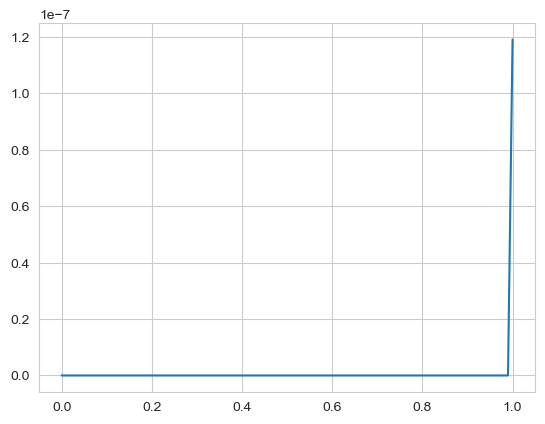

In [278]:
x = np.linspace(0,1,100)
y = [find_threshold(x_, cost_female, data_filtered)[-1] for x_ in x]
plt.plot(x, y)

Training Progress:  11%|█         | 107/1000 [00:00<00:00, 908.99it/s]

❗ Early stopping triggered.



/var/folders/kd/ts8cjkj92cb51mz6vfv08mnm0000gn/T/ipykernel_37488/1019241329.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=profits, palette="coolwarm")


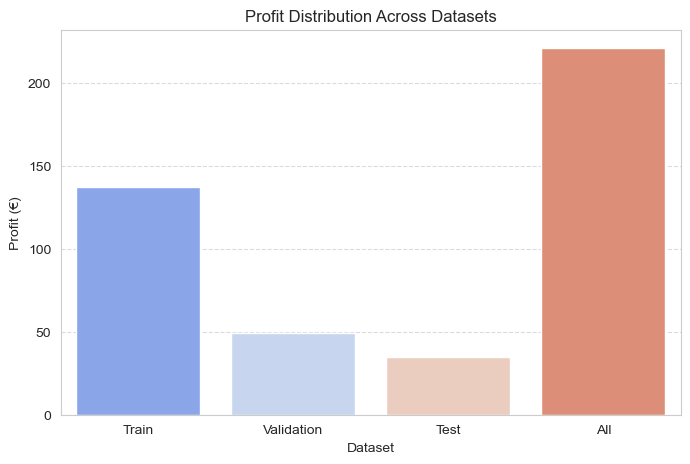


🔹 Profit Summary 🔹
----------------------
📈 Train Profit:  €137.00
📉 Validation Profit: €49.00
📊 Test Profit:   €35.00
💰 All Profit: €221.00
----------------------


In [267]:
# --- Improved Model Definition ---
class AbaloneNet(nn.Module):
    def __init__(self, input_dim):
        super(AbaloneNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)  # Single neuron for binary classification
        )

    def forward(self, x):
        return self.net(x)  # No sigmoid here! It will be applied in loss function

model = AbaloneNet(input_dim=X_train.shape[1])

class ProfitLoss(nn.Module):
    def __init__(self, profit_true_male=1, cost_female=-10):
        super(ProfitLoss, self).__init__()
        self.profit_true_male = profit_true_male
        self.cost_female = cost_female

    def forward(self, y_pred, y_true):
        probs = torch.sigmoid(y_pred)  # Convert logits to probabilities

        # Profit-based loss (differentiable)
        profit_per_sample = y_true * self.profit_true_male * probs + \
                            (1 - y_true) * self.cost_female * (1 - probs)

        # Use negative mean profit as loss to maximize profit
        loss = -torch.mean(profit_per_sample)
        return loss

criterion = ProfitLoss(profit_true_male=profit_true_male, cost_female=cost_female)
optimizer = optim.Adam(model.parameters(), lr=0.005)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)

# --- Early Stopping ---
class EarlyStopping:
    def __init__(self, patience=15, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.best_loss = np.inf
        self.best_profit = -np.inf
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, val_profit, model):
        if val_loss < self.best_loss or val_profit > self.best_profit:
            self.best_loss = val_loss
            self.best_profit = val_profit
            self.counter = 0
            self.best_model_state = model.state_dict()
        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

    def load_best_model(self, model):
        if self.best_model_state:
            model.load_state_dict(self.best_model_state)

early_stopping = EarlyStopping(patience=25, verbose=False)

# --- Training Loop ---
epochs = 1000
for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    train_loss = criterion(outputs, y_train)
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_proba = torch.sigmoid(val_outputs)
        val_acc = accuracy_score(y_val.numpy(), (val_proba >= 0.5).numpy())

    scheduler.step()

    # print(f"📊 Epoch [{epoch}/{epochs}] Train Loss: {train_loss.item():.4f} | "
    #       f"Val Loss: {val_loss.item():.4f} | Val Acc: {val_acc:.4f} | "
    #       f"LR: {optimizer.param_groups[0]['lr']:.6f}")

    early_stopping(val_loss.item(), -train_loss.item(), model)  # Profit is negative loss
    if early_stopping.early_stop:
        print("❗ Early stopping triggered.")
        break

early_stopping.load_best_model(model)

# --- Compute Profits ---
# --- Compute Profits ---
def compute_profit(y_true, y_pred_proba):
    """ Computes total profit using true labels and predicted probabilities. """
    y_pred = (y_pred_proba >= 0.5).float()
    cm = confusion_matrix(y_true.numpy(), y_pred.numpy())

    TP = cm[1, 1]  # True Positives (Males correctly classified)
    FP_F = cm[0, 1]  # False Positives (Females misclassified as Males)

    total_profit = TP * profit_true_male + FP_F * cost_female
    return total_profit

model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_proba = torch.sigmoid(test_outputs)
    test_profit = compute_profit(y_test, test_proba)

    val_outputs = model(X_val)
    val_proba = torch.sigmoid(val_outputs)
    val_profit = compute_profit(y_val, val_proba)

    train_outputs = model(X_train)
    train_proba = torch.sigmoid(train_outputs)
    train_profit = compute_profit(y_train, train_proba)

    all_outputs = model(torch.tensor(X, dtype=torch.float32))
    all_proba = torch.sigmoid(all_outputs)
    all_profit = compute_profit(torch.tensor(y, dtype=torch.float32), all_proba)

# --- Plot Profits ---
profits = [train_profit, val_profit, test_profit, all_profit]
labels = ["Train", "Validation", "Test", "All"]
plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=profits, palette="coolwarm")
plt.title("Profit Distribution Across Datasets")
plt.xlabel("Dataset")
plt.ylabel("Profit (€)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Print Profit Summary ---
print("\n🔹 Profit Summary 🔹")
print("----------------------")
print(f"📈 Train Profit:  €{train_profit:.2f}")
print(f"📉 Validation Profit: €{val_profit:.2f}")
print(f"📊 Test Profit:   €{test_profit:.2f}")
print(f"💰 All Profit: €{all_profit:.2f}")
print("----------------------")

In [246]:
all_outputs

tensor([[13.5901],
        [17.2786],
        [12.0069],
        ...,
        [12.0069],
        [10.0711],
        [ 9.3209]])

In [198]:

model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_proba = torch.sigmoid(test_outputs)
    test_profit = compute_profit(y_val, test_proba, threshold=0.5)
    test_pred = (test_proba.numpy() >= 0.5).astype(int)
    test_cm = confusion_matrix(y_test.numpy(), test_pred)

    all_outputs = model(torch.tensor(X, dtype=torch.float32))
    all_proba = torch.sigmoid(all_outputs)

    all_profit = compute_profit(torch.tensor(y, dtype=torch.float32), all_proba, threshold=0.5)
    all_pred = (all_proba.numpy() >= 0.5).astype(int)
    num_pred_males = np.sum(all_pred)
    all_cm = confusion_matrix(y, all_pred)

# Nicely formatted output
print("\n🔹 Profit Summary 🔹")
print("----------------------")
print(f"📊 Test Profit:   €{test_profit:.2f}")
print(f"📈 Train Profit:  €{train_profit:.2f}")
print(f"📉 Validation Profit: €{val_profit:.2f}")
print(f"💰 All Profit: €{all_profit:.2f}")
print(f"🔢 Number of Predicted Males: {num_pred_males}")
print("----------------------")


Training Progress:  25%|██▌       | 250/1000 [00:00<00:00, 1264.87it/s]

📊 Epoch [1/1000] Train Loss: 2.3399 | Val Loss: 2.0416 | Val Acc: 0.4603 | LR: 0.005000
📊 Epoch [2/1000] Train Loss: 2.0717 | Val Loss: 1.7499 | Val Acc: 0.5432 | LR: 0.005000
📊 Epoch [3/1000] Train Loss: 1.7838 | Val Loss: 1.4471 | Val Acc: 0.5432 | LR: 0.005000
📊 Epoch [4/1000] Train Loss: 1.4822 | Val Loss: 1.1469 | Val Acc: 0.5432 | LR: 0.005000
📊 Epoch [5/1000] Train Loss: 1.1814 | Val Loss: 0.8585 | Val Acc: 0.5432 | LR: 0.005000
📊 Epoch [6/1000] Train Loss: 0.8923 | Val Loss: 0.5988 | Val Acc: 0.5432 | LR: 0.005000
📊 Epoch [7/1000] Train Loss: 0.6312 | Val Loss: 0.3666 | Val Acc: 0.5432 | LR: 0.005000
📊 Epoch [8/1000] Train Loss: 0.3962 | Val Loss: 0.1672 | Val Acc: 0.5432 | LR: 0.005000
📊 Epoch [9/1000] Train Loss: 0.1928 | Val Loss: -0.0026 | Val Acc: 0.5432 | LR: 0.005000
📊 Epoch [10/1000] Train Loss: 0.0189 | Val Loss: -0.1425 | Val Acc: 0.5432 | LR: 0.005000
📊 Epoch [11/1000] Train Loss: -0.1250 | Val Loss: -0.2520 | Val Acc: 0.5432 | LR: 0.005000
📊 Epoch [12/1000] Train Lo

Training Progress:  38%|███▊      | 378/1000 [00:00<00:00, 1269.68it/s]

📊 Epoch [251/1000] Train Loss: -0.5401 | Val Loss: -0.5431 | Val Acc: 0.5432 | LR: 0.001250
📊 Epoch [252/1000] Train Loss: -0.5401 | Val Loss: -0.5431 | Val Acc: 0.5432 | LR: 0.001250
📊 Epoch [253/1000] Train Loss: -0.5401 | Val Loss: -0.5431 | Val Acc: 0.5432 | LR: 0.001250
📊 Epoch [254/1000] Train Loss: -0.5401 | Val Loss: -0.5431 | Val Acc: 0.5432 | LR: 0.001250
📊 Epoch [255/1000] Train Loss: -0.5401 | Val Loss: -0.5431 | Val Acc: 0.5432 | LR: 0.001250
📊 Epoch [256/1000] Train Loss: -0.5401 | Val Loss: -0.5431 | Val Acc: 0.5432 | LR: 0.001250
📊 Epoch [257/1000] Train Loss: -0.5401 | Val Loss: -0.5431 | Val Acc: 0.5432 | LR: 0.001250
📊 Epoch [258/1000] Train Loss: -0.5401 | Val Loss: -0.5431 | Val Acc: 0.5432 | LR: 0.001250
📊 Epoch [259/1000] Train Loss: -0.5401 | Val Loss: -0.5431 | Val Acc: 0.5432 | LR: 0.001250
📊 Epoch [260/1000] Train Loss: -0.5401 | Val Loss: -0.5431 | Val Acc: 0.5432 | LR: 0.001250
📊 Epoch [261/1000] Train Loss: -0.5401 | Val Loss: -0.5431 | Val Acc: 0.5432 | L

Training Progress:  72%|███████▏  | 723/1000 [00:00<00:00, 1261.62it/s]

📊 Epoch [506/1000] Train Loss: -0.5402 | Val Loss: -0.5431 | Val Acc: 0.5432 | LR: 0.000156
EarlyStopping counter: 1/15
📊 Epoch [507/1000] Train Loss: -0.5402 | Val Loss: -0.5431 | Val Acc: 0.5432 | LR: 0.000156
📊 Epoch [508/1000] Train Loss: -0.5402 | Val Loss: -0.5431 | Val Acc: 0.5432 | LR: 0.000156
EarlyStopping counter: 1/15
📊 Epoch [509/1000] Train Loss: -0.5402 | Val Loss: -0.5431 | Val Acc: 0.5432 | LR: 0.000156
📊 Epoch [510/1000] Train Loss: -0.5402 | Val Loss: -0.5431 | Val Acc: 0.5432 | LR: 0.000156
📊 Epoch [511/1000] Train Loss: -0.5402 | Val Loss: -0.5431 | Val Acc: 0.5432 | LR: 0.000156
EarlyStopping counter: 1/15
📊 Epoch [512/1000] Train Loss: -0.5402 | Val Loss: -0.5431 | Val Acc: 0.5432 | LR: 0.000156
EarlyStopping counter: 2/15
📊 Epoch [513/1000] Train Loss: -0.5402 | Val Loss: -0.5431 | Val Acc: 0.5432 | LR: 0.000156
📊 Epoch [514/1000] Train Loss: -0.5402 | Val Loss: -0.5431 | Val Acc: 0.5432 | LR: 0.000156
EarlyStopping counter: 1/15
📊 Epoch [515/1000] Train Loss: -


🔍 Initial Data Overview 🔍
---------------------------
               Sex       Length     Diameter       Height  WholeWeight  \
count  2649.000000  2649.000000  2649.000000  2649.000000  2649.000000   
mean      0.506606     0.502420     0.389766     0.132673     0.734883   
std       0.500051     0.124057     0.102599     0.043959     0.476925   
min       0.000000     0.075000     0.055000     0.000000     0.002000   
25%       0.000000     0.420000     0.325000     0.105000     0.353500   
50%       1.000000     0.515000     0.400000     0.135000     0.651500   
75%       1.000000     0.600000     0.470000     0.160000     1.064500   
max       1.000000     0.815000     0.650000     1.130000     2.657000   

       ShuckedWeight  VisceraWeight  ShellWeight        Rings  
count    2649.000000    2649.000000  2649.000000  2649.000000  
mean        0.316926       0.160433     0.213948     9.488486  
std         0.209986       0.107188     0.137821     3.251185  
min         0.001000  

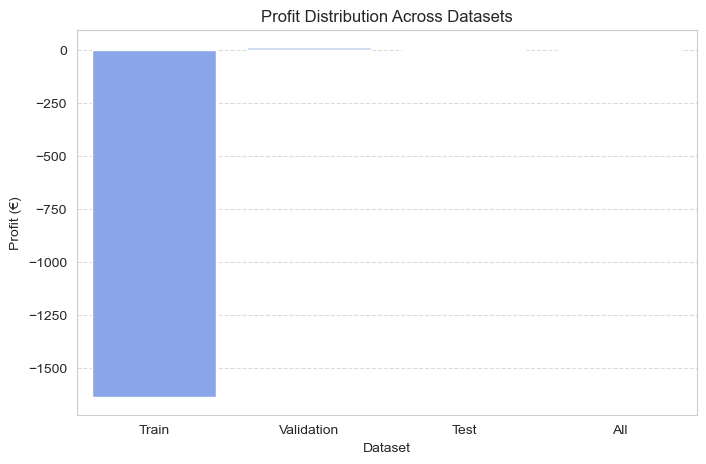

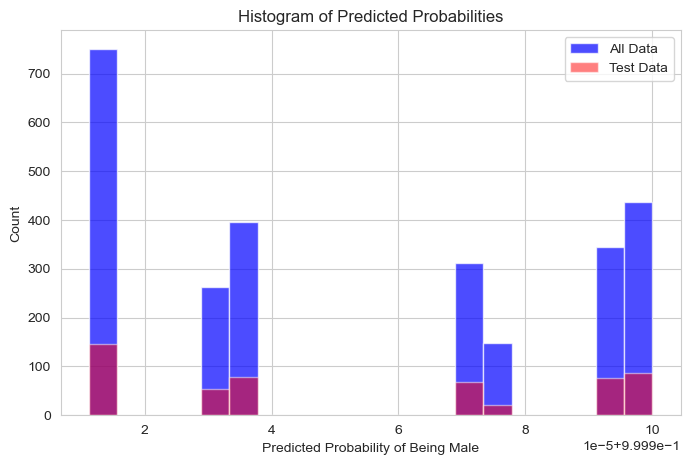

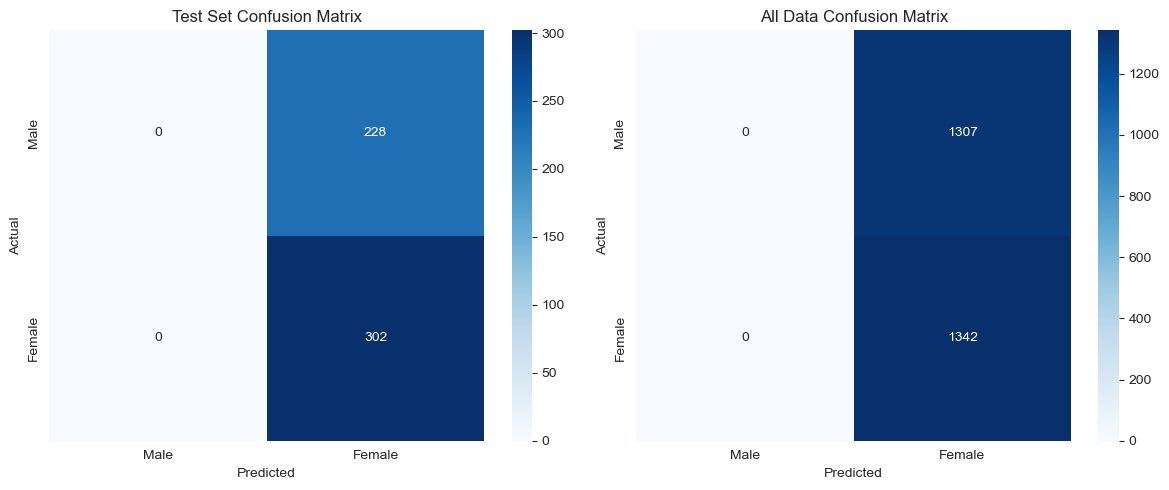

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch
from sklearn.metrics import confusion_matrix

# Display Initial Dataset Information
print("\n🔍 Initial Data Overview 🔍")
print("---------------------------")
print(data_filtered.describe())
print("---------------------------")
print("Class Distribution:")
print(data_filtered['Sex'].value_counts())
print("---------------------------")

model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_proba = torch.sigmoid(test_outputs)
    test_profit = compute_profit(y_val, test_proba, threshold=0.5)
    test_pred = (test_proba.numpy() >= 0.5).astype(int)
    test_cm = confusion_matrix(y_test.numpy(), test_pred)

    all_outputs = model(torch.tensor(X, dtype=torch.float32))
    all_proba = torch.sigmoid(all_outputs)

    all_profit = compute_profit(torch.tensor(y, dtype=torch.float32), all_proba, threshold=0.5)
    all_pred = (all_proba.numpy() >= 0.5).astype(int)
    num_pred_males = np.sum(all_pred)
    all_cm = confusion_matrix(y, all_pred)

# Nicely formatted output
print("\n🔹 Profit Summary 🔹")
print("----------------------")
print(f"📊 Test Profit:   €{test_profit:.2f}")
print(f"📈 Train Profit:  €{train_profit:.2f}")
print(f"📉 Validation Profit: €{val_profit:.2f}")
print(f"💰 All Profit: €{all_profit:.2f}")
print(f"🔢 Number of Predicted Males: {num_pred_males}")
print("----------------------")

# Visualizing Profit Distribution
profit_data = pd.DataFrame({"Dataset": ["Train", "Validation", "Test", "All"], "Profit (€)": [train_profit, val_profit, test_profit, all_profit]})

plt.figure(figsize=(8, 5))
sns.barplot(data=profit_data, x="Dataset", y="Profit (€)", hue="Dataset", dodge=False, legend=False, palette="coolwarm")
plt.title("Profit Distribution Across Datasets")
plt.xlabel("Dataset")
plt.ylabel("Profit (€)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histogram of Predicted Probabilities
plt.figure(figsize=(8, 5))
plt.hist(all_proba.numpy(), bins=20, color='blue', alpha=0.7, label='All Data')
plt.hist(test_proba.numpy(), bins=20, color='red', alpha=0.5, label='Test Data')
plt.title("Histogram of Predicted Probabilities")
plt.xlabel("Predicted Probability of Being Male")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'], ax=axes[0])
axes[0].set_title("Test Set Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(all_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'], ax=axes[1])
axes[1].set_title("All Data Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

Total Profit on Full Dataset: €-3500.00


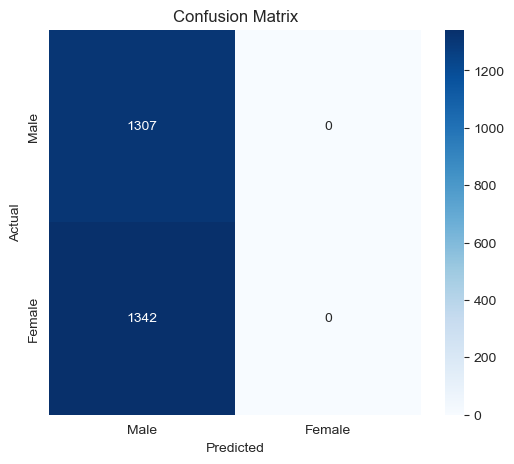

In [178]:
# --- Evaluate Profit on the Whole Dataset with Confusion Matrix ---
def evaluate_profit_and_confusion_matrix(model, data, threshold=0.5, profit_true_male=100, cost_female=-100):
    model.eval()
    with torch.no_grad():
        y_pred_logits = model(torch.tensor(data[['Rings']].values, dtype=torch.float32))
        y_pred_proba = torch.sigmoid(y_pred_logits).numpy()

    # Apply threshold
    y_pred = (y_pred_proba >= threshold).astype(int)

    # Compute Confusion Matrix
    cm = confusion_matrix(data['Sex'].values, y_pred)

    # Compute True Positives (Male -> Male) and False Positives (Female -> Male)
    TP = cm[0, 0]  # True Males correctly classified
    FP_F = cm[1, 0]  # Females misclassified as Males

    # Compute total profit
    total_profit = TP * profit_true_male + FP_F * cost_female
    print(f"Total Profit on Full Dataset: €{total_profit:.2f}")

    # Display Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return total_profit
total_profit = evaluate_profit_and_confusion_matrix(model, data_filtered, threshold=0.5)

💡 Optimal Threshold for Maximum Profit: 0.00 with Profit: €-3400


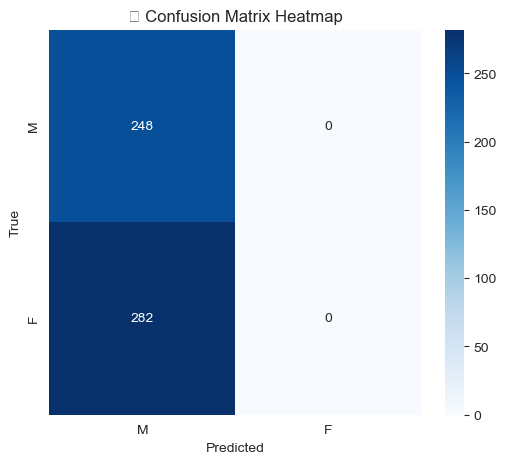

TP:248, FP_F:282


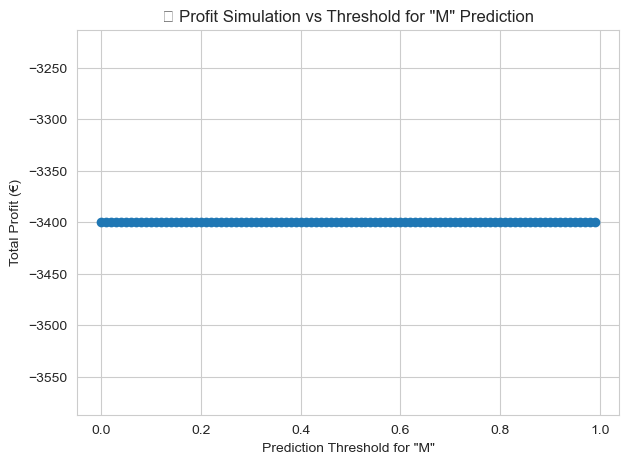

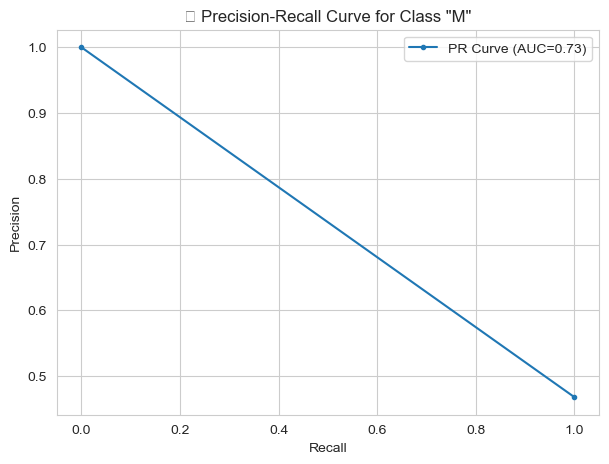

In [136]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc

# --- Find Optimal Threshold for Profit Maximization ---
model.eval()
with torch.no_grad():
    y_pred_logits = model(X_test)
    y_pred_proba = torch.softmax(y_pred_logits, dim=1)
    m_probs = y_pred_proba[:, 0]

test_thresholds = np.arange(0.0, 1.0, 0.01)
profits = []
for t in test_thresholds:
    pred_t = torch.where(m_probs >= t, torch.tensor(0), torch.tensor(1))  # Only M/F classes
    cm = confusion_matrix(y_test, pred_t)
    TP = cm[0, 0]  # M -> M
    FP_F = cm[1, 0]  # F -> M
    profit = TP * profit_true_male + FP_F * cost_female
    profits.append(profit)

optimal_threshold = test_thresholds[np.argmax(profits)]
print(f"💡 Optimal Threshold for Maximum Profit: {optimal_threshold:.2f} with Profit: €{max(profits)}")

pred_t = torch.where(m_probs >= optimal_threshold, torch.tensor(0), torch.tensor(1))
cm = confusion_matrix(y_test, pred_t)

# --- Confusion Matrix Visualization ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['M', 'F'], yticklabels=['M', 'F'])
plt.title('🔍 Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

TP = cm[0, 0]
FP_F = cm[1, 0]
print(f'TP:{TP}, FP_F:{FP_F}')

# --- Profit per Threshold Visualization ---
plt.figure(figsize=(7, 5))
plt.plot(test_thresholds, profits, marker='o')
plt.title('💸 Profit Simulation vs Threshold for "M" Prediction')
plt.xlabel('Prediction Threshold for "M"')
plt.ylabel('Total Profit (€)')
plt.grid(True)
plt.show()

# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve((y_test == 0).numpy(), m_probs.numpy())
pr_auc = auc(recall, precision)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('📈 Precision-Recall Curve for Class "M"')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
# 📦 Suppress Warnings from sklearn (zero_division handled manually)
warnings.filterwarnings("ignore", category=UserWarning)

# --- Data Preparation ---
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])  # M=0, F=1, I=2
X = data.drop(columns=['Sex']).values
y = data['Sex'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# --- Model Definition ---
class AbaloneNet(nn.Module):
    def __init__(self, input_dim):
        super(AbaloneNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 3)
        )

    def forward(self, x):
        return self.net(x)

model = AbaloneNet(input_dim=X_train.shape[1])

# --- Custom Profit Loss ---
profit_true_male = 500
cost_female = -100
cost_infant = -150

class ProfitLoss(nn.Module):
    def __init__(self):
        super(ProfitLoss, self).__init__()
        self.cost_matrix = torch.tensor([
            [profit_true_male, cost_female, cost_infant],
            [cost_female, 0, 0],
            [cost_infant, 0, 0]
        ], dtype=torch.float32)

    def forward(self, y_pred, y_true):
        probs = torch.softmax(y_pred, dim=1)
        profits = torch.zeros(len(y_true), dtype=torch.float32, device=y_pred.device)
        for i in range(len(y_true)):
            true_class = y_true[i].item()
            profit = (probs[i] @ self.cost_matrix[true_class].T)
            profits[i] = profit
        return -torch.mean(profits)

criterion = ProfitLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50, eta_min=1e-5)

# --- Early Stopping with Profit Monitoring ---
class EarlyStopping:
    def __init__(self, patience=20, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.best_loss = np.inf
        self.best_profit = -np.inf
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, val_profit, model):
        if val_loss < self.best_loss or val_profit > self.best_profit:
            self.best_loss = val_loss
            self.best_profit = val_profit
            self.counter = 0
            self.best_model_state = model.state_dict()
        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

    def load_best_model(self, model):
        if self.best_model_state:
            model.load_state_dict(self.best_model_state)

early_stopping = EarlyStopping(patience=20, verbose=True)

# --- Training Loop ---
epochs = 5000
for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    train_loss = criterion(outputs, y_train)
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_preds = torch.argmax(torch.softmax(val_outputs, dim=1), dim=1)
        val_acc = accuracy_score(y_val.numpy(), val_preds.numpy())

    val_profit = -val_loss.item()
    scheduler.step()

    print(f"📊 Epoch [{epoch}/{epochs}] Train Loss: {train_loss.item():.4f} | Val Loss: {val_loss.item():.4f} | Val Profit: {val_profit:.2f} | Val Acc: {val_acc:.4f} | LR: {optimizer.param_groups[0]['lr']:.6f}")

    early_stopping(val_loss.item(), val_profit, model)
    if early_stopping.early_stop:
        print("❗ Early stopping triggered.")
        break

early_stopping.load_best_model(model)

Training Progress:   0%|          | 0/5000 [00:00<?, ?it/s]

📊 Epoch [1/5000] Train Loss: 10.2209 | Val Loss: 5.9853 | Val Profit: -5.99 | Val Acc: 0.3589 | LR: 0.000999
📊 Epoch [2/5000] Train Loss: 4.6807 | Val Loss: 3.7657 | Val Profit: -3.77 | Val Acc: 0.3840 | LR: 0.000996
📊 Epoch [3/5000] Train Loss: -0.9242 | Val Loss: 1.2924 | Val Profit: -1.29 | Val Acc: 0.4318 | LR: 0.000991
📊 Epoch [4/5000] Train Loss: -6.0898 | Val Loss: -1.4638 | Val Profit: 1.46 | Val Acc: 0.4569 | LR: 0.000984
📊 Epoch [5/5000] Train Loss: -11.6902 | Val Loss: -4.5387 | Val Profit: 4.54 | Val Acc: 0.4677 | LR: 0.000976
📊 Epoch [6/5000] Train Loss: -16.1392 | Val Loss: -7.9602 | Val Profit: 7.96 | Val Acc: 0.4653 | LR: 0.000965
📊 Epoch [7/5000] Train Loss: -20.4587 | Val Loss: -11.5692 | Val Profit: 11.57 | Val Acc: 0.4689 | LR: 0.000953
📊 Epoch [8/5000] Train Loss: -24.3127 | Val Loss: -15.2624 | Val Profit: 15.26 | Val Acc: 0.4833 | LR: 0.000939
📊 Epoch [9/5000] Train Loss: -27.4991 | Val Loss: -18.9423 | Val Profit: 18.94 | Val Acc: 0.4904 | LR: 0.000923
📊 Epoch [

💡 Optimal Threshold for Maximum Profit: 0.05 with Profit: €72000


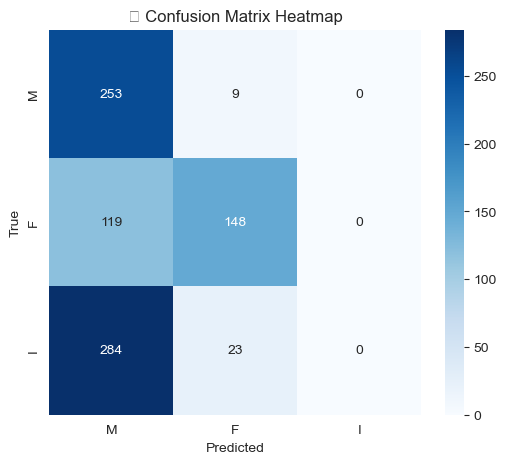

TP:253, FP_F:119, FP_I:284


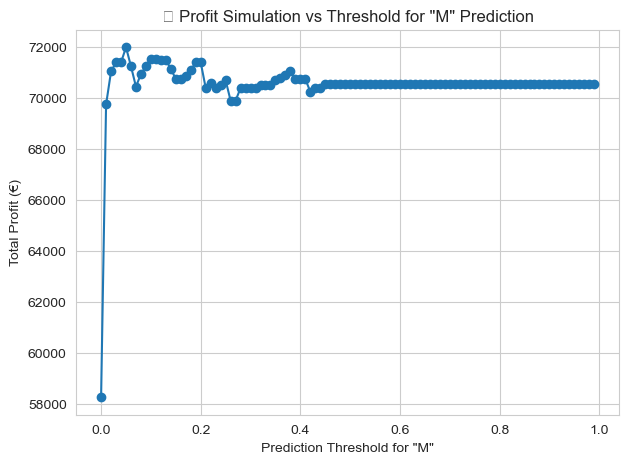

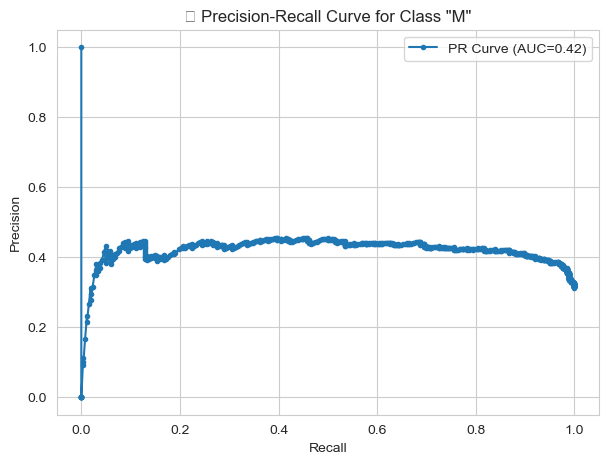

In [27]:
# --- Find Optimal Threshold for Profit Maximization ---
model.eval()
with torch.no_grad():
    y_pred_logits = model(X_test)
    y_pred_proba = torch.softmax(y_pred_logits, dim=1)
    m_probs = y_pred_proba[:, 0]

test_thresholds = np.arange(0.0, 1.0, 0.01)
profits = []
for t in test_thresholds:
    pred_t = torch.where(m_probs >= t, torch.tensor(0), torch.argmax(y_pred_proba, dim=1))
    cm = confusion_matrix(y_test, pred_t)
    TP = cm[0, 0]
    FP_F = cm[1, 0]
    FP_I = cm[2, 0]
    profit = TP * profit_true_male + FP_F * cost_female + FP_I * cost_infant
    profits.append(profit)

optimal_threshold = test_thresholds[np.argmax(profits)]
print(f"💡 Optimal Threshold for Maximum Profit: {optimal_threshold:.2f} with Profit: €{max(profits)}")

pred_t = torch.where(m_probs >= optimal_threshold, torch.tensor(0), torch.argmax(y_pred_proba, dim=1))
cm = confusion_matrix(y_test, pred_t)
# --- Confusion Matrix Visualization ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['M', 'F', 'I'], yticklabels=['M', 'F', 'I'])
plt.title('🔍 Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
TP = cm[0, 0]
FP_F = cm[1, 0]
FP_I = cm[2, 0]

print(f'TP:{TP}, FP_F:{FP_F}, FP_I:{FP_I}')




# --- Profit per Threshold Visualization ---
plt.figure(figsize=(7, 5))
plt.plot(test_thresholds, profits, marker='o')
plt.title('💸 Profit Simulation vs Threshold for "M" Prediction')
plt.xlabel('Prediction Threshold for "M"')
plt.ylabel('Total Profit (€)')
plt.grid(True)
plt.show()

# --- Precision-Recall Curve ---
precision, recall, thresholds = precision_recall_curve((y_test == 0).numpy(), m_probs.numpy())
pr_auc = auc(recall, precision)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('📈 Precision-Recall Curve for Class "M"')
plt.legend()
plt.grid(True)
plt.show()


Counter({2: 918, 1: 824, 0: 763})


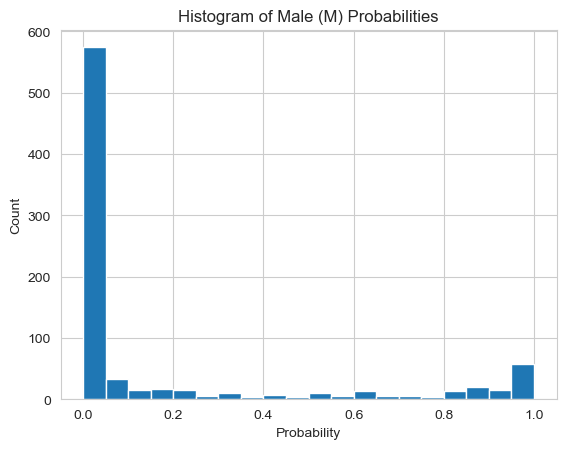

In [74]:
import collections
print(collections.Counter(y_train.numpy()))
plt.hist(m_probs.numpy(), bins=20)
plt.title("Histogram of Male (M) Probabilities")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.show()

<Figure size 1000x600 with 0 Axes>

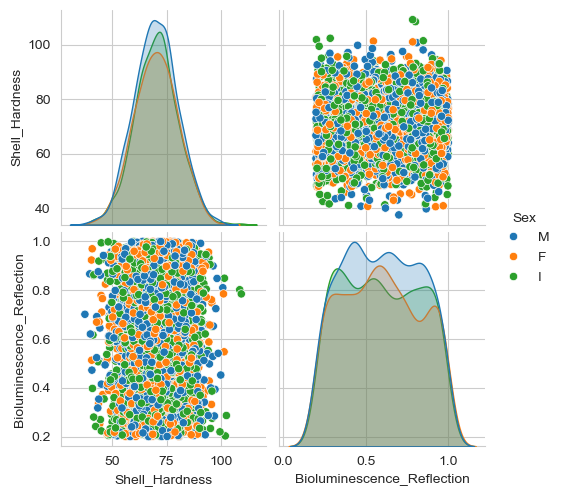

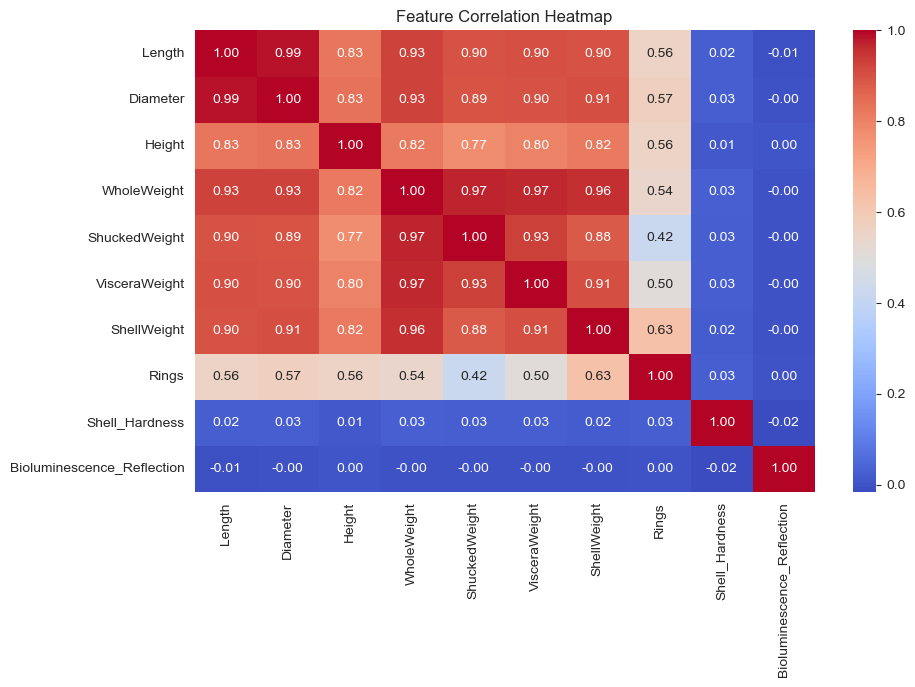

In [8]:
# # Encode Sex
# le = LabelEncoder()
# data['Sex'] = le.fit_transform(data['Sex'])  # M=0, F=1, I=2

# Add Artificial Features
np.random.seed(42)
data["Shell_Hardness"] = np.random.normal(loc=70, scale=10, size=len(data))
data["Bioluminescence_Reflection"] = np.random.uniform(0.2, 1.0, len(data))

plot_features = ['Shell_Hardness', 'Bioluminescence_Reflection', 'Sex']
# Pairplot of numerical features
plt.figure(figsize=(10,6))
sns.pairplot(data[plot_features], hue='Sex', diag_kind='kde')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.drop(columns=['Sex']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1/500] Train Loss: 203.9582 | Val Loss: 221.2935 | Val Acc: 0.3636 | LR: 0.001000
Epoch [2/500] Train Loss: 194.6564 | Val Loss: 216.2624 | Val Acc: 0.3612 | LR: 0.001000
Epoch [3/500] Train Loss: 184.0819 | Val Loss: 211.0447 | Val Acc: 0.3600 | LR: 0.001000
Epoch [4/500] Train Loss: 176.9923 | Val Loss: 206.0079 | Val Acc: 0.3577 | LR: 0.001000
Epoch [5/500] Train Loss: 166.2254 | Val Loss: 200.8453 | Val Acc: 0.3541 | LR: 0.001000
Epoch [6/500] Train Loss: 158.7323 | Val Loss: 195.6490 | Val Acc: 0.3529 | LR: 0.001000
Epoch [7/500] Train Loss: 151.5515 | Val Loss: 190.1292 | Val Acc: 0.3529 | LR: 0.001000
Epoch [8/500] Train Loss: 143.6220 | Val Loss: 184.6960 | Val Acc: 0.3577 | LR: 0.001000
Epoch [9/500] Train Loss: 135.8798 | Val Loss: 179.1848 | Val Acc: 0.3565 | LR: 0.001000
Epoch [10/500] Train Loss: 128.0624 | Val Loss: 173.4841 | Val Acc: 0.3600 | LR: 0.001000
Epoch [11/500] Train Loss: 124.5871 | Val Loss: 167.6443 | Val Acc: 0.3612 | LR: 0.001000
Epoch [12/500] Trai

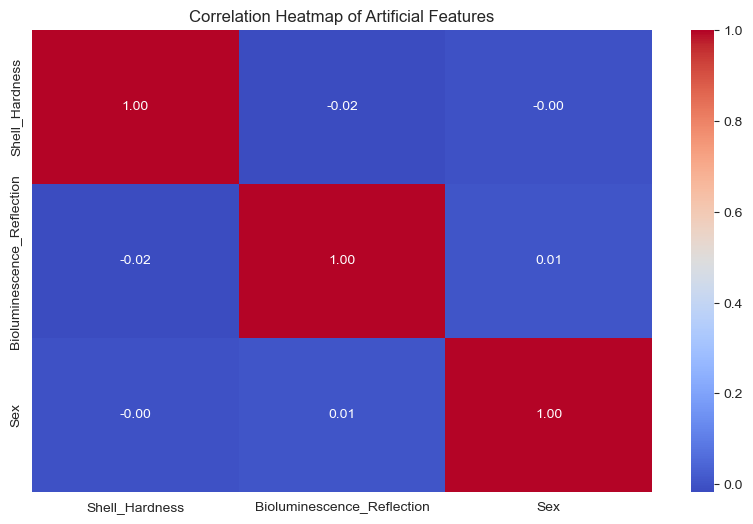

In [9]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])  # M=0, F=1, I=2
# Normalize Features
scaler = StandardScaler()
feature_columns = ['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Shell_Hardness', 'Bioluminescence_Reflection']
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Prepare Train/Test Split
X = data[feature_columns].values
y = data['Sex'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to Torch Tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)

# Define Neural Network Model
class AbaloneNet(nn.Module):
    def __init__(self, input_dim):
        super(AbaloneNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 3)
        )

    def forward(self, x):
        return self.net(x)

# Define Custom Profit Loss Function
class ProfitLoss(nn.Module):
    def __init__(self):
        super(ProfitLoss, self).__init__()
        self.cost_matrix = torch.tensor([
            [500,    0,     0],    # M->M
            [-1000,  0,     0],    # F->M
            [-1500,  0,     0]     # I->M
        ], dtype=torch.float32)

    def forward(self, y_pred, y_true):
        probs = torch.softmax(y_pred, dim=1)
        one_hot = torch.nn.functional.one_hot(y_true, num_classes=3).float()
        profit = torch.sum(one_hot * (probs @ self.cost_matrix.T), dim=1)
        return -torch.mean(profit)

# Initialize Model
model = AbaloneNet(input_dim=X_train.shape[1])
criterion = ProfitLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5, verbose=True)

# Training Loop
epochs = 500
for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    train_loss = criterion(outputs, y_train)
    train_loss.backward()
    optimizer.step()

    # Validation Step
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_preds = torch.argmax(torch.softmax(val_outputs, dim=1), dim=1)
        val_acc = accuracy_score(y_val.numpy(), val_preds.numpy())

    scheduler.step(val_loss)

    # Logging
    print(f"Epoch [{epoch}/{epochs}] Train Loss: {train_loss.item():.4f} | Val Loss: {val_loss.item():.4f} | Val Acc: {val_acc:.4f} | LR: {optimizer.param_groups[0]['lr']:.6f}")

# Visualizing Feature Importance via Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data[['Shell_Hardness', 'Bioluminescence_Reflection', 'Sex']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Artificial Features')
plt.show()


/opt/anaconda3/envs/2025_02_python_3_12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 1000x600 with 0 Axes>

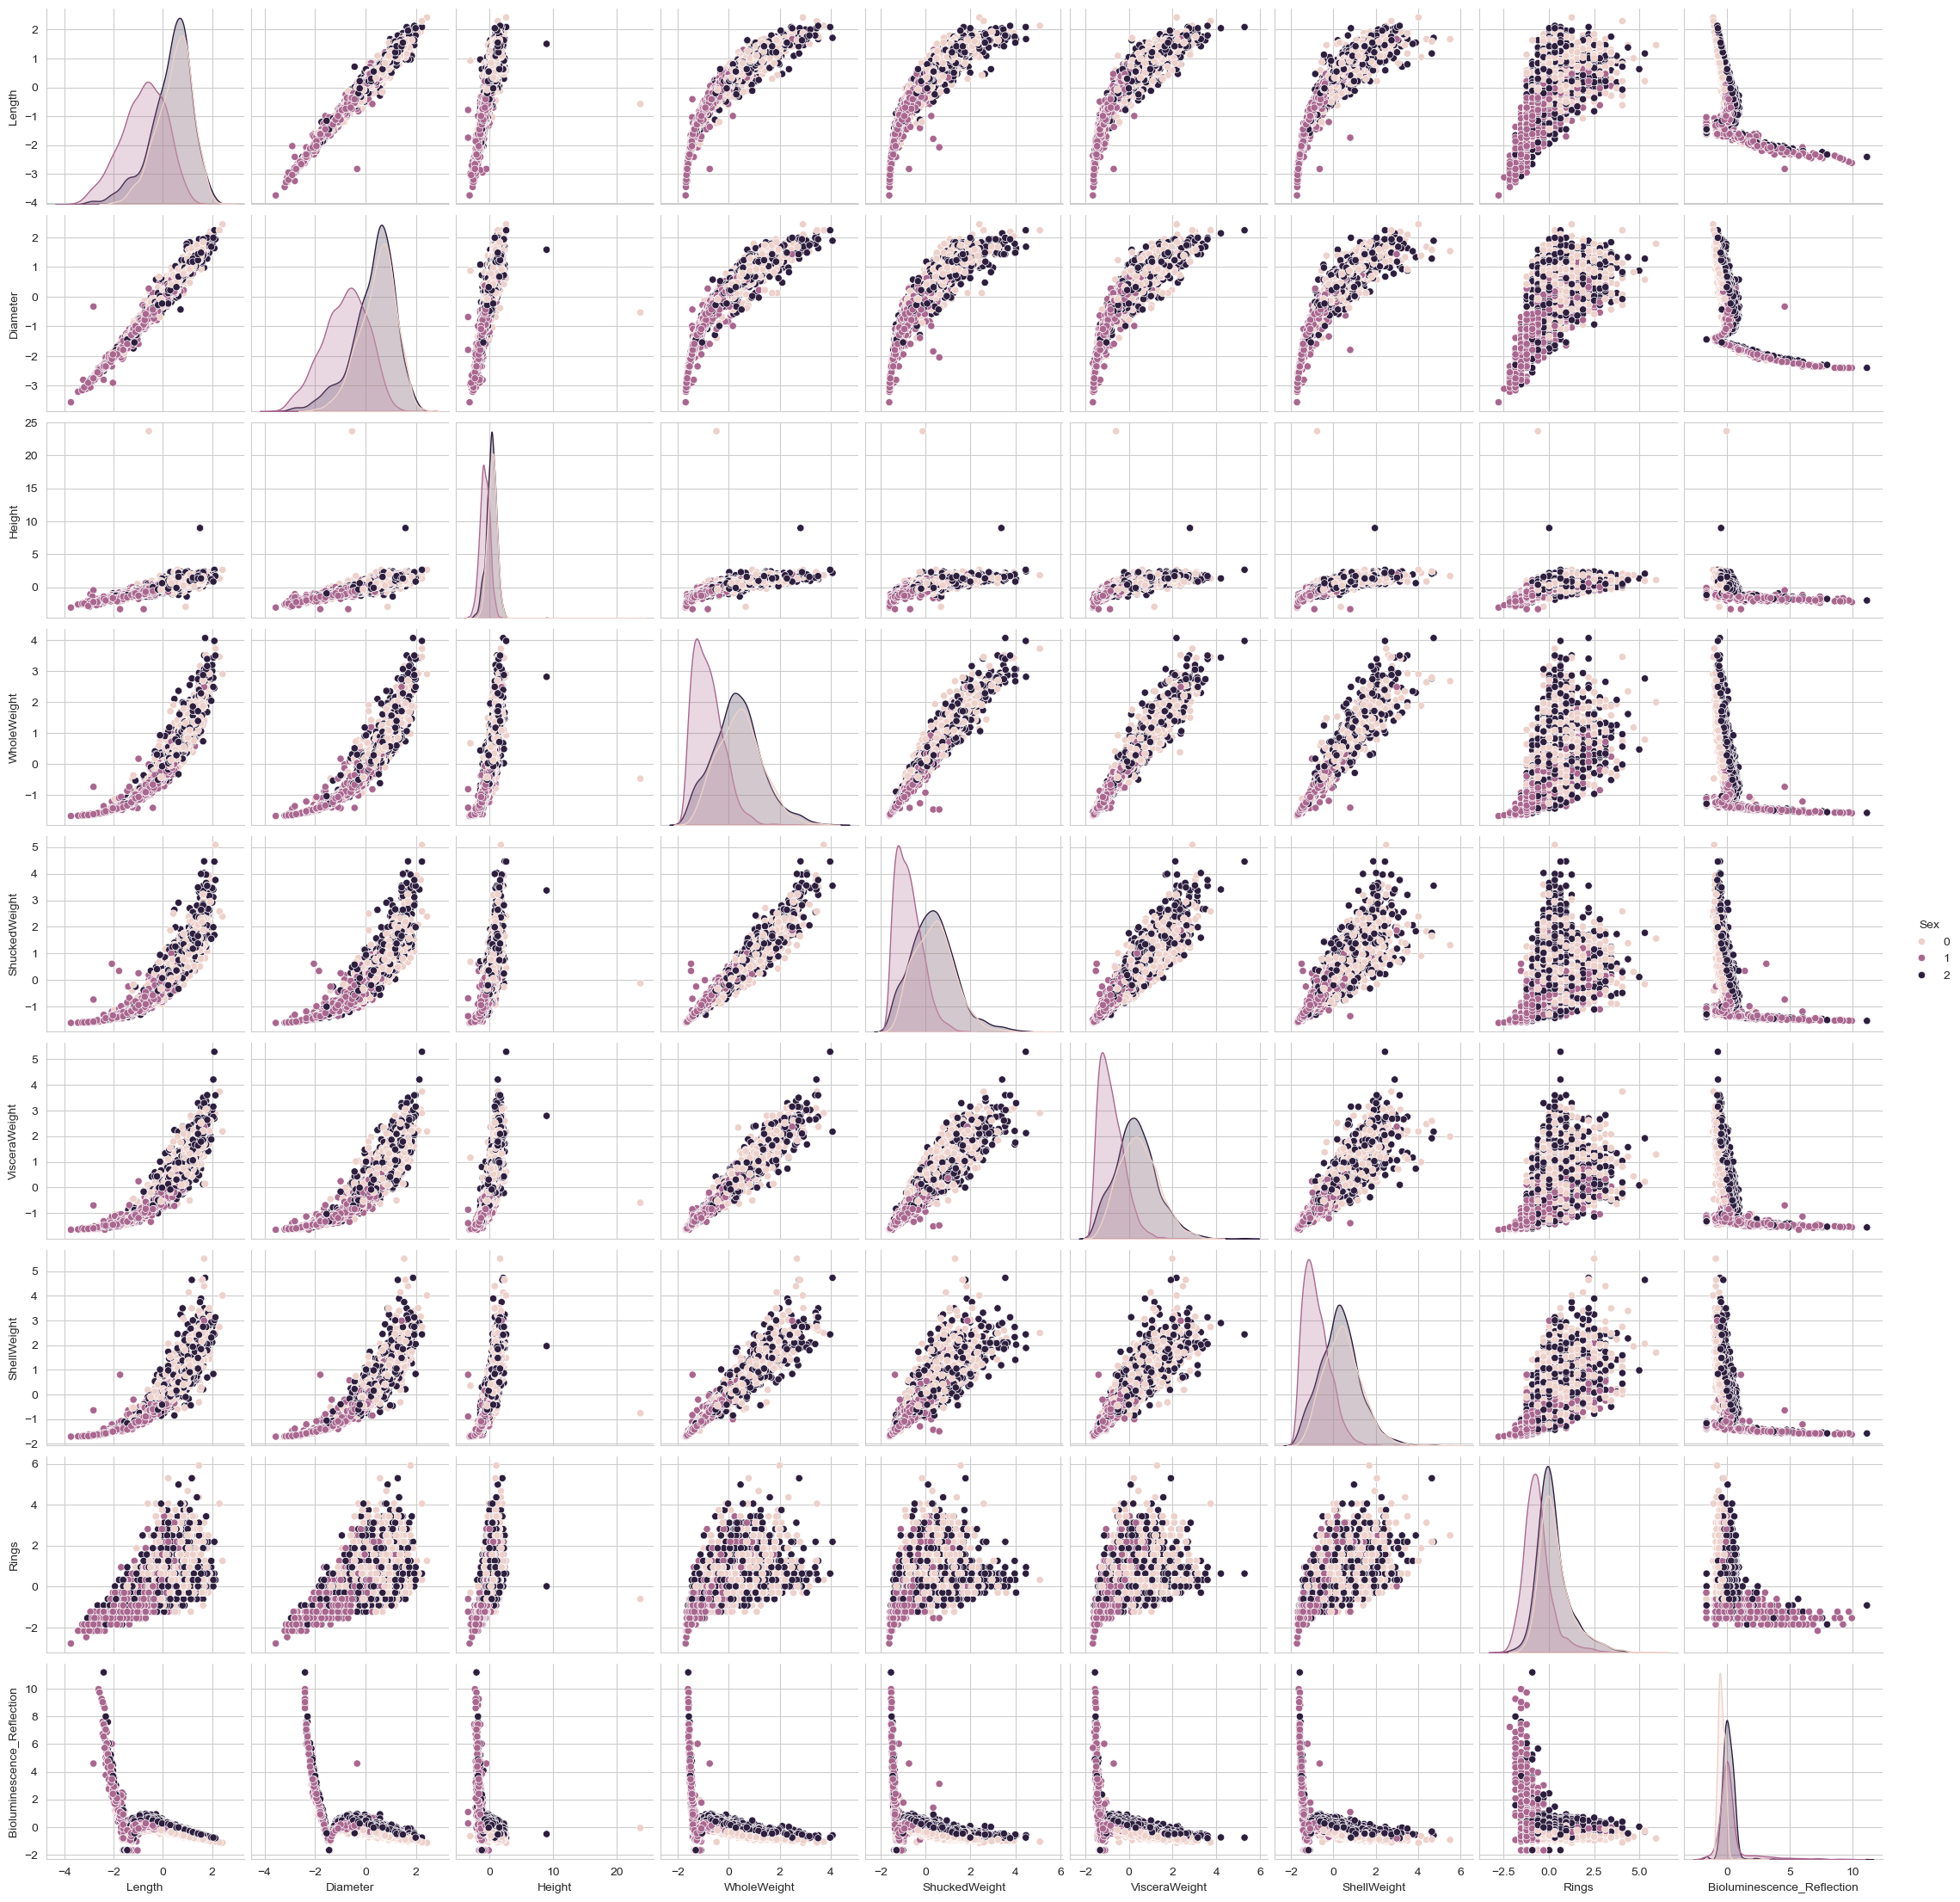

In [48]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

# Encode Sex
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])  # M=0, F=1, I=2

# Add Artificial Feature: Improved Bioluminescence Reflection Calculation
data["Bioluminescence_Reflection"] = np.sqrt(
    np.exp(-data["Length"]) * abs(np.log(data["Diameter"] + data["Diameter"].max())) / (1 + abs(data["Sex"] - data["Sex"].max() * 1.5))
)

# Normalize Feature
scaler = StandardScaler()
data[['Bioluminescence_Reflection']] = scaler.fit_transform(data[['Bioluminescence_Reflection']])

# Visualization
plt.figure(figsize=(10, 6))
sns.pairplot(data, hue='Sex', diag_kind='kde')
plt.show()

Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

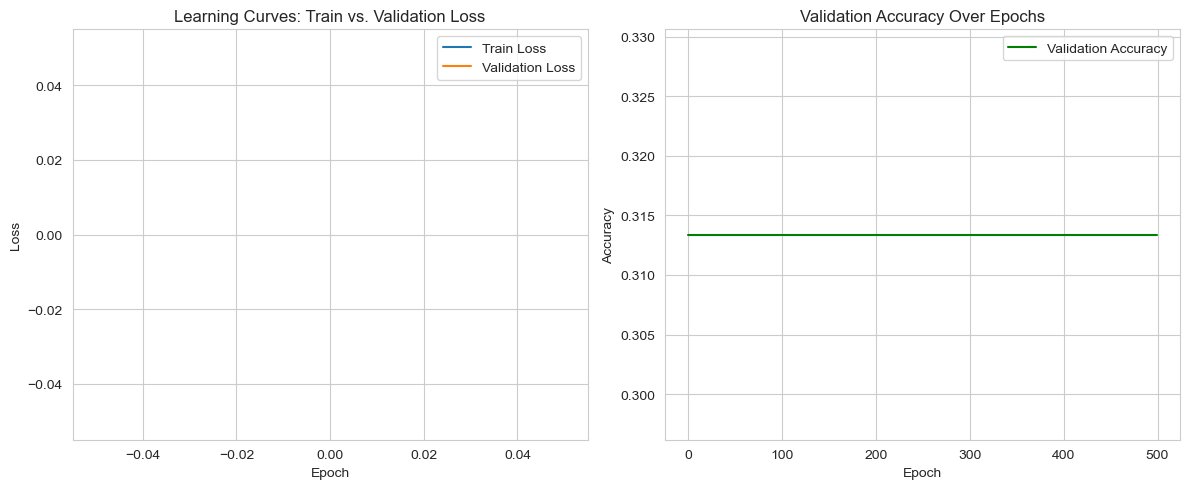

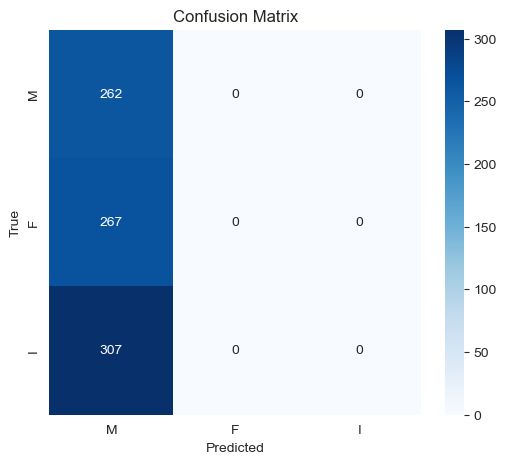

              precision    recall  f1-score   support

           M       0.31      1.00      0.48       262
           F       0.00      0.00      0.00       267
           I       0.00      0.00      0.00       307

    accuracy                           0.31       836
   macro avg       0.10      0.33      0.16       836
weighted avg       0.10      0.31      0.15       836



ValueError: Input contains NaN.

In [59]:
# Prepare Train/Test Split
all_features = ['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings', 'Bioluminescence_Reflection']
X = data[all_features].values
y = data['Sex'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to Torch Tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)

# Define Neural Network Model
class AbaloneNet(nn.Module):
    def __init__(self, input_dim):
        super(AbaloneNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(16, 3)
        )

    def forward(self, x):
        return self.net(x)

class ProfitLoss(nn.Module):
    def __init__(self):
        super(ProfitLoss, self).__init__()
        self.cost_matrix = torch.tensor([
            [500,    0,     0],    # M->M
            [-1000,  0,     0],    # F->M
            [-1500,  0,     0]     # I->M
        ], dtype=torch.float32)

    def forward(self, y_pred, y_true):
        probs = torch.softmax(y_pred, dim=1)
        profits = torch.zeros(len(y_true), dtype=torch.float32, device=y_pred.device)  # Create a tensor of zeros of the correct length
        for i in range(len(y_true)):
            true_class = y_true[i].item()
            predicted_prob = probs[i]
            profit = (predicted_prob @ self.cost_matrix[true_class].T)
            profits[i] = profit # Add the tensor to the tensor of profits
        return -torch.mean(profits)

# Initialize Model
model = AbaloneNet(input_dim=X_train.shape[1])
criterion = ProfitLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5, verbose=True)

# Training Loop
epochs = 500
train_losses = []
val_losses = []
val_accuracies = []

for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    train_loss = criterion(outputs, y_train)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())

    # Validation Step
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_preds = torch.argmax(torch.softmax(val_outputs, dim=1), dim=1)
        val_acc = accuracy_score(y_val.numpy(), val_preds.numpy())
        val_losses.append(val_loss.item())
        val_accuracies.append(val_acc)

    scheduler.step(val_loss)

    # Logging (optional, you can uncomment to see epoch-wise output)
    #print(f"Epoch [{epoch}/{epochs}] Train Loss: {train_loss.item():.4f} | Val Loss: {val_loss.item():.4f} | Val Acc: {val_acc:.4f} | LR: {optimizer.param_groups[0]['lr']:.6f}")

# --- Post-Training Analysis and Insightful Plots ---

# 1. Learning Curves: Train vs. Validation Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Learning Curves: Train vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 2. Validation Accuracy Over Epochs
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy', color='green')
plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 3. Confusion Matrix
model.eval()
with torch.no_grad():
    y_pred_logits = model(X_val)
    y_pred_proba = torch.softmax(y_pred_logits, dim=1)
    y_pred = torch.argmax(y_pred_proba, dim=1)
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['M', 'F', 'I'], yticklabels=['M', 'F', 'I'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 4. Classification Report
report = classification_report(y_val, y_pred, target_names=['M', 'F', 'I'], zero_division=0)
print(report)

# 5. Precision-Recall Curve for Class "M"
precision, recall, thresholds = precision_recall_curve((y_val == 0).numpy(), y_pred_proba[:, 0].numpy())
pr_auc = auc(recall, precision)
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Class "M"')
plt.legend()
plt.grid(True)
plt.show()

#6. Correlation Heatmap of All Features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Features')
plt.show()

# Visualizing Feature Importance via Correlation Matrix of our features
plt.figure(figsize=(6, 4))
sns.heatmap(data[['Bioluminescence_Reflection', 'Sex']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Artificial Features')
plt.show()

#7 Pairplot
plt.figure(figsize=(10, 6))
sns.pairplot(data[['Length', 'Diameter', 'Rings', 'Bioluminescence_Reflection', 'Sex']], hue='Sex', diag_kind='kde')
plt.show()

Training Progress:   0%|          | 0/5000 [00:00<?, ?it/s]

EarlyStopping counter: 1/20
EarlyStopping counter: 1/20
EarlyStopping counter: 2/20
EarlyStopping counter: 3/20
EarlyStopping counter: 4/20
EarlyStopping counter: 5/20
EarlyStopping counter: 1/20
EarlyStopping counter: 2/20
EarlyStopping counter: 3/20
EarlyStopping counter: 4/20
EarlyStopping counter: 5/20
EarlyStopping counter: 6/20
EarlyStopping counter: 7/20
EarlyStopping counter: 8/20
EarlyStopping counter: 9/20
EarlyStopping counter: 10/20
EarlyStopping counter: 11/20
EarlyStopping counter: 1/20
EarlyStopping counter: 2/20
EarlyStopping counter: 1/20
EarlyStopping counter: 1/20
EarlyStopping counter: 2/20
EarlyStopping counter: 3/20
EarlyStopping counter: 4/20
EarlyStopping counter: 5/20
EarlyStopping counter: 6/20
EarlyStopping counter: 7/20
EarlyStopping counter: 8/20
EarlyStopping counter: 9/20
EarlyStopping counter: 10/20
EarlyStopping counter: 11/20
EarlyStopping counter: 12/20
EarlyStopping counter: 1/20
EarlyStopping counter: 1/20
EarlyStopping counter: 2/20
EarlyStopping c

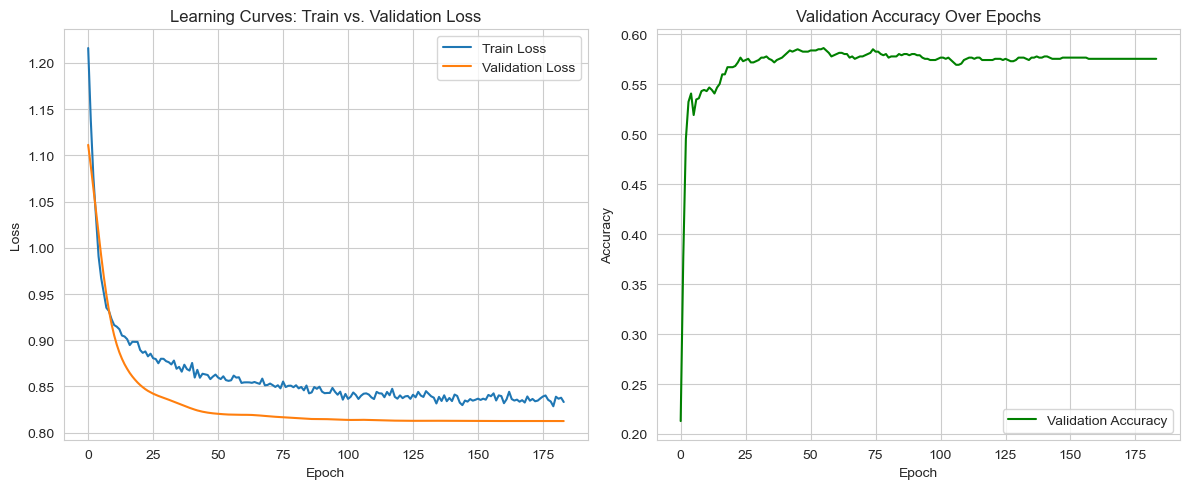

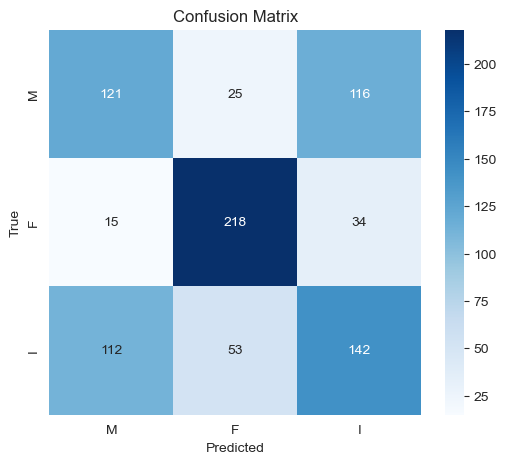

              precision    recall  f1-score   support

           M       0.49      0.46      0.47       262
           F       0.74      0.82      0.77       267
           I       0.49      0.46      0.47       307

    accuracy                           0.58       836
   macro avg       0.57      0.58      0.57       836
weighted avg       0.57      0.58      0.57       836



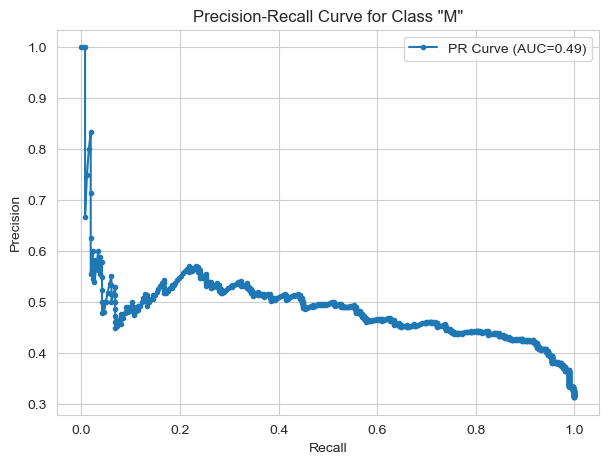

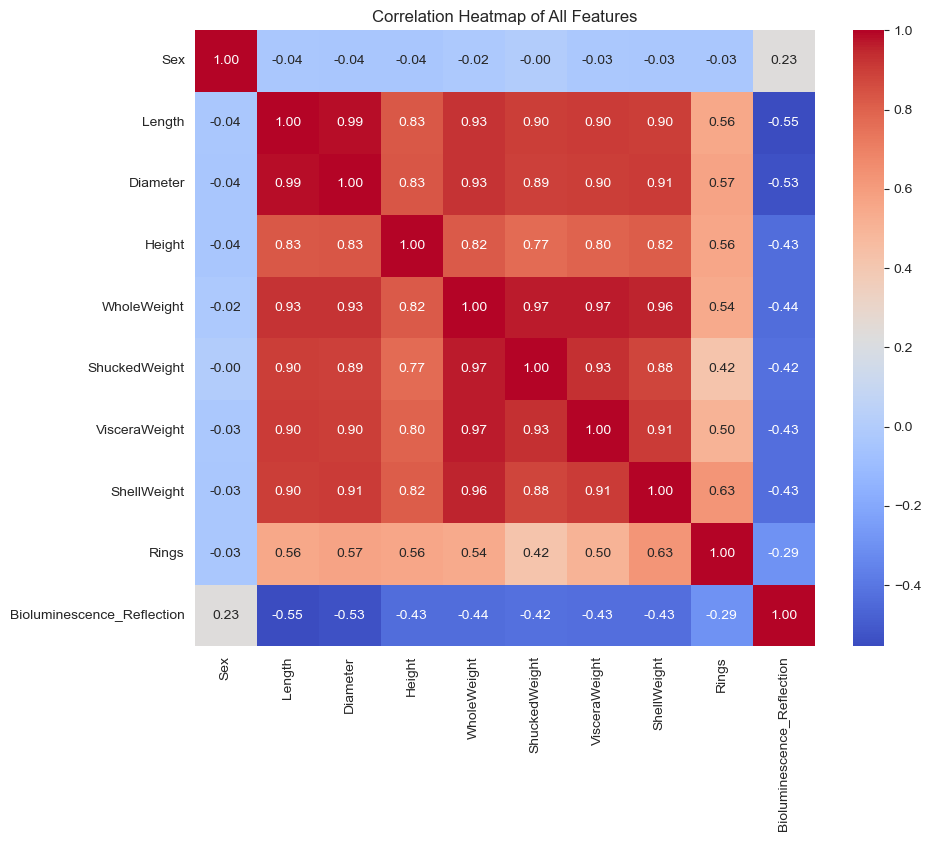

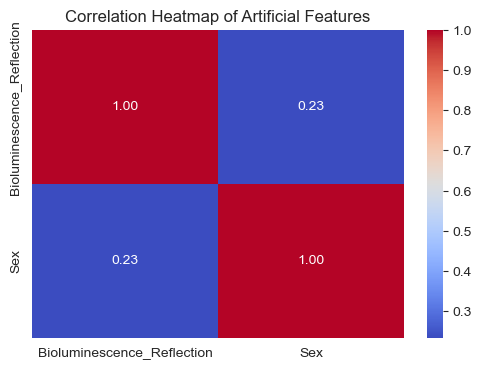

<Figure size 1000x600 with 0 Axes>

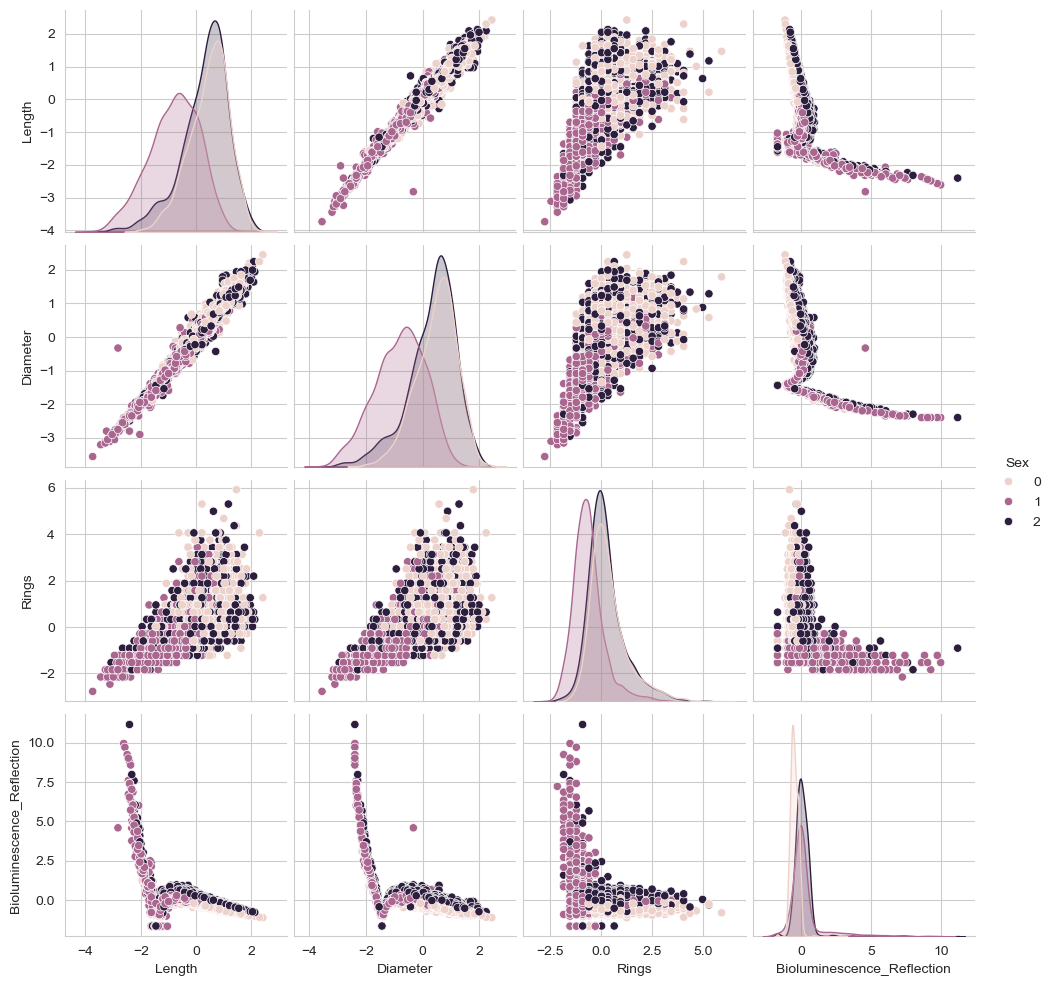

In [60]:
# Prepare Train/Test Split
all_features = ['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
X = data[all_features].values
y = data['Sex'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to Torch Tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)

# Define Neural Network Model (Normal Classifier)
class AbaloneClassifier(nn.Module):
    def __init__(self, input_dim):
        super(AbaloneClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),  # Added BatchNorm
            nn.ReLU(),
            nn.Dropout(0.3),      # Added Dropout
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),   # Added BatchNorm
            nn.ReLU(),
            nn.Dropout(0.2),      # Added Dropout
            nn.Linear(64, 3)
        )

    def forward(self, x):
        return self.net(x)

# Define Loss Function (Cross-Entropy for Normal Classifier)
criterion = nn.CrossEntropyLoss()

# Initialize Model
model = AbaloneClassifier(input_dim=X_train.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5, verbose=True)

# --- Early Stopping Setup ---
class EarlyStopping:
    def __init__(self, patience=10, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.best_loss = np.inf
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

early_stopping = EarlyStopping(patience=20, verbose=True)

# Training Loop
epochs = 5000
train_losses = []
val_losses = []
val_accuracies = []

for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    train_loss = criterion(outputs, y_train)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())

    # Validation Step
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_preds = torch.argmax(torch.softmax(val_outputs, dim=1), dim=1)
        val_acc = accuracy_score(y_val.numpy(), val_preds.numpy())
        val_losses.append(val_loss.item())
        val_accuracies.append(val_acc)

    scheduler.step(val_loss)

     # --- Early Stopping ---
    early_stopping(val_loss.item(), model)
    if early_stopping.early_stop:
        print("❗ Early stopping triggered.")
        break

    # Logging (optional, you can uncomment to see epoch-wise output)
    # print(f"Epoch [{epoch}/{epochs}] Train Loss: {train_loss.item():.4f} | Val Loss: {val_loss.item():.4f} | Val Acc: {val_acc:.4f} | LR: {optimizer.param_groups[0]['lr']:.6f}")

# --- Post-Training Analysis and Insightful Plots ---

# 1. Learning Curves: Train vs. Validation Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Learning Curves: Train vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 2. Validation Accuracy Over Epochs
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy', color='green')
plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 3. Confusion Matrix
model.eval()
with torch.no_grad():
    y_pred_logits = model(X_val)
    y_pred_proba = torch.softmax(y_pred_logits, dim=1)
    y_pred = torch.argmax(y_pred_proba, dim=1)
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['M', 'F', 'I'], yticklabels=['M', 'F', 'I'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 4. Classification Report
report = classification_report(y_val, y_pred, target_names=['M', 'F', 'I'], zero_division=0)
print(report)

# 5. Precision-Recall Curve for Class "M"
precision, recall, thresholds = precision_recall_curve((y_val == 0).numpy(), y_pred_proba[:, 0].numpy())
pr_auc = auc(recall, precision)
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Class "M"')
plt.legend()
plt.grid(True)
plt.show()

#6. Correlation Heatmap of All Features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Features')
plt.show()

# Visualizing Feature Importance via Correlation Matrix of our features
plt.figure(figsize=(6, 4))
sns.heatmap(data[['Bioluminescence_Reflection', 'Sex']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Artificial Features')
plt.show()

#7 Pairplot
plt.figure(figsize=(10, 6))
sns.pairplot(data[['Length', 'Diameter', 'Rings', 'Bioluminescence_Reflection', 'Sex']], hue='Sex', diag_kind='kde')
plt.show()